# <center>Modèles Linéaires</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notation-et-définitions" data-toc-modified-id="Notation-et-définitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notation et définitions</a></span></li><li><span><a href="#Modèles-linéaires-pour-la-régression" data-toc-modified-id="Modèles-linéaires-pour-la-régression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modèles linéaires pour la régression</a></span></li><li><span><a href="#Modèles-linéaires-pour-la-classification" data-toc-modified-id="Modèles-linéaires-pour-la-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modèles linéaires pour la classification</a></span></li><li><span><a href="#Modèles-linéaires-pour-la-classification-multiclasse" data-toc-modified-id="Modèles-linéaires-pour-la-classification-multiclasse-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modèles linéaires pour la classification multiclasse</a></span></li><li><span><a href="#Aperçu-des-modèles-linéaires" data-toc-modified-id="Aperçu-des-modèles-linéaires-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aperçu des modèles linéaires</a></span></li><li><span><a href="#Résumé" data-toc-modified-id="Résumé-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Résumé</a></span></li></ul></div>

![](https://larmarange.github.io/guide-R/analyses/regression-lineaire_files/figure-html/fig-rel-petal.width-petal.length-lm-1.png)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Installation automatique lors de l'exécution sur Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/master'):
    !git clone -q https://github.com/ML-course/master.git /content/master
    !pip --quiet install -r /content/master/requirements_colab.txt
    %cd master/notebooks

# Importations et paramètres globaux
%matplotlib inline
from preamble import *
interactive = True # Définir à True pour les tracés interactifs
if interactive:
    fig_scale = 1.5
else: # Pour l'affichage
    fig_scale = 0.3
    plt.rcParams.update(print_config)
    

## Notation et définitions 
* Un _scalaire_ est une valeur numérique simple, désignée par une lettre en italique : $x=3.24$.
* Un _vecteur_ est un tableau ordonné 1D de _n_ scalaires, désigné par une lettre en gras : $\mathbf{x}=[3.24, 1.2]$.
    * $x_i$ désigne le $i$ème élément d'un vecteur, donc $x_0 = 3.24$.
        * Remarque : d'autres cours utilisent la notation $x^{(i)}$.
* Un _ensemble_ est une collection _non ordonnée_ d'éléments uniques, désignés par une majuscule caligraphique : $\mathcal{S}=\{3,24, 1,2\}$.
* Une _matrice_ est un tableau 2D de scalaires, désigné par une majuscule en gras : $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
2.24 & 0.2 
\end{bmatrix}$
    * $\textbf{X}_{i}$ désigne la $i$ème _rangée_ de la matrice
    * $\textbf{X}_{ :,j}$ désigne la $j$ème _colonne_
    * $\textbf{X}_{i,j}$ désigne l'_élément_ dans la $i$ème ligne, $j$ème colonne, donc $\mathbf{X}_{1,0} = 2.24$.

* $\mathbf{X}^{n \times p}$, une matrice de $n \times p$, peut représenter $n$ points de données dans un espace à $p$ dimensions. 
    * Chaque ligne est un vecteur qui peut représenter un _point_ dans un espace à p dimensions, étant donné une _base_.
    * La _base standard_ d'un espace euclidien est l'ensemble des vecteurs unitaires.
* Par exemple, si $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
3.0 & 0.6 
\end{bmatrix}$

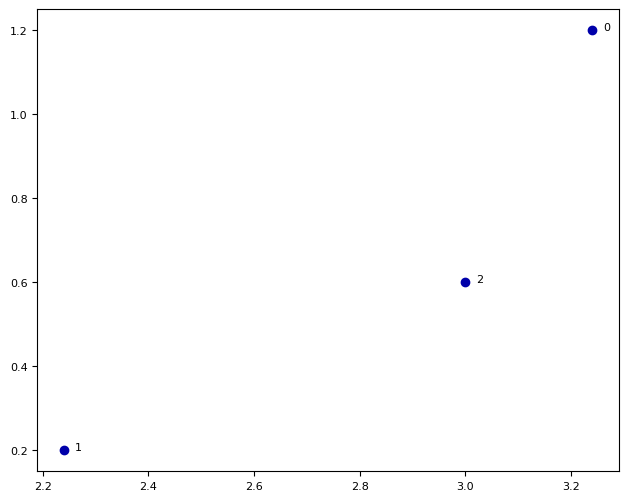

In [3]:
X = np.array([[3.24 , 1.2 ],[2.24, 0.2],[3.0 , 0.6 ]]) 
fig = plt.figure(figsize=(5*fig_scale,4*fig_scale))
plt.scatter(X[:,0],X[:,1]);
for i in range(3):
    plt.annotate(i, (X[i,0]+0.02, X[i,1]))

* Un _tenseur_ est un tableau de données à _k_ dimensions, désigné par une majuscule en italique : $T$
    * _k_ est également appelé ordre, degré ou rang
    * $T_{i,j,k,...}$ désigne l'élément ou le sous-tenseur à la position correspondante.
    * Un ensemble d'images couleur peut être représenté par :
        * un tenseur 4D (échantillon x hauteur x largeur x canal de couleur)

        * un tenseur 2D (échantillon x vecteur aplati de valeurs de pixels)
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/08_images.png" alt="ml" style="width: 40%;"/>

### Opérations de base
* Les sommes et les produits sont désignés par les lettres majuscules Sigma et Pi :

$$\sum_{i=0}^{p} = x_0 + x_1 + ... + x_p \quad \prod_{i=0}^{p} = x_0 \cdot x_1 \cdot ... \cdot x_p$$

Les opérations sur les vecteurs sont effectuées en fonction des éléments : par exemple $\mathbf{x}+\mathbf{z} = [x_0+z_0,x_1+z_1, ... , x_p+z_p]$ * Le produit point $\mathbf{x}+\mathbf{z} = x_0+z_0,x_1+z_1, ... , x_p+z_p]$
* Produit point $\mathbf{w}\mathbf{x} = \mathbf{w} \cdot \mathbf{x} = \mathbf{w}^{T} \mathbf{x} = \sum_{i=0}^{p} w_i \cdot x_i = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p$
* Produit matriciel $\mathbf{W}\mathbf{x} = \begin{bmatrix}
\mathbf{w_0} \cdot \mathbf{x} 
... 
\mathbf{w_p} \cdot \mathbf{x} \end{bmatrix}$
* Une fonction $f(x) = y$ relie un élément d'entrée $x$ à un élément de sortie $y$
    * Elle a un _minimum local_ à $x=c$ si $f(x) \geq f(c)$ dans l'intervalle $(c-\epsilon, c+\epsilon)$.
    * Elle a un _minimum global_ à $x=c$ si $f(x) \geq f(c)$ pour toute valeur de $x$.
* Une fonction vectorielle consomme une entrée et produit un vecteur : $\mathbf{f}(\mathbf{x}) = \mathbf{y}$
* $\underset{x\in X}{\operatorname{max}}f(x)$ renvoie la plus grande valeur f(x) pour n'importe quel x
* $\underset{x\in X}{\operatorname{argmax}}f(x)$ renvoie l'élément x qui maximise f(x)

### Gradients
* Une _dérivée_ $f'$ d'une fonction $f$ décrit la vitesse de croissance ou de décroissance de $f$.
* Le processus de recherche d'une dérivée s'appelle la différenciation.
    * Les dérivées des fonctions de base sont connues
    * Pour les fonctions non basiques, nous utilisons la règle de la chaîne : $F(x) = f(g(x)) \rightarrow F'(x)=f'(g(x))g'(x)$
* Une fonction est _différentiable_ si elle a une dérivée en tout point de son domaine.
    * Elle est _différenciable de façon continue_ si $f'$ est une fonction continue.
    * On dit que $f$ est _lisse_ s'il est _infiniment différentiable_, c'est-à-dire que $f', f'', f''', ...$ existent tous.
* Un _gradient_ $\nabla f$ est la dérivée d'une fonction en plusieurs dimensions.
    * C'est un vecteur de dérivées partielles : $\nabla f = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},... \right]$
    * E.g. $f=2x_0+3x_1^{2}-\sin(x_2) \rightarrow \nabla f= [2, 6x_1, -cos(x_2)]$

* Exemple : $f = -(x_0^2+x_1^2)$
    * $\nabla f = \left[\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}\right] = \left[-2x_0,-2x_1\right]$ 
    * Évalué au point (-4,1) : $\nabla f(-4,1) = [8,-2]$
        * Ce sont les pentes au point (-4,1) dans la direction de $x_0$ et $x_1$ respectivement.

In [4]:
from mpl_toolkits import mplot3d
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# f = -(x0^2 + x1^2)
def g_f(x0, x1):
    return -(x0 ** 2 + x1 ** 2)
def g_dfx0(x0):
    return -2 * x0
def g_dfx1(x1):
    return -2 * x1

@interact
def plot_gradient(rotation=(0,240,10)):
    # représente la surface de f
    fig = plt.figure(figsize=(12*fig_scale,5*fig_scale))
    ax = plt.axes(projection="3d")
    x0 = np.linspace(-6, 6, 30)
    x1 = np.linspace(-6, 6, 30)
    X0, X1 = np.meshgrid(x0, x1)
    ax.plot_surface(X0, X1, g_f(X0, X1), rstride=1, cstride=1,
                    cmap='winter', edgecolor='none',alpha=0.3)

    # choisi un point à évaluer: (-4,1)
    i0 = -4
    i1 = 1
    iz = np.linspace(g_f(i0,i1), -82, 30)
    ax.scatter3D(i0, i1, g_f(i0,i1), c="k", s=20*fig_scale,label='($i_0$,$i_1$) = (-4,1)')
    ax.plot3D([i0]*30, [i1]*30, iz, linewidth=1*fig_scale, c='silver', linestyle='-')
    ax.set_zlim(-80,0)

    # représente les intersections
    ax.plot3D(x0,[1]*30,g_f(x0, 1),linewidth=3*fig_scale,alpha=0.9,label='$f(x_0,i_1)$',c='r',linestyle=':')
    ax.plot3D([-4]*30,x1,g_f(-4, x1),linewidth=3*fig_scale,alpha=0.9,label='$f(i_0,x_1)$',c='b',linestyle=':')

    # df/dx0 est la pente de la ligne au point d'intersection
    x0 = np.linspace(-8, 0, 30)
    ax.plot3D(x0,[1]*30,g_dfx0(i0)*x0-g_f(i0,i1),linewidth=3*fig_scale,label=r'$\frac{\partial f}{\partial x_0}(i_0,i_1) x_0 + f(i_0,i_1)$',c='r',linestyle='-')
    ax.plot3D([-4]*30,x1,g_dfx1(i1)*x1+g_f(i0,i1),linewidth=3*fig_scale,label=r'$\frac{\partial f}{\partial x_1}(i_0,i_1) x_1 + f(i_0,i_1)$',c='b',linestyle='-')

    ax.set_xlabel('x0', labelpad=-4/fig_scale)
    ax.set_ylabel('x1', labelpad=-4/fig_scale)
    ax.get_zaxis().set_ticks([])
    ax.view_init(30, rotation) # Utiliser ceci pour effectuer une rotation de la figure
    ax.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.tick_params(axis='both', width=0, labelsize=10*fig_scale, pad=-6)

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=120, description='rotation', max=240, step=10), Output()), _dom_classes=…

### Distributions et probabilités
* La distribution normale (gaussienne) avec une moyenne $\mu$ et un écart type $\sigma$ est notée $N(\mu,\sigma)$.
* Une variable aléatoire $X$ peut être continue ou discrète.
* Une distribution de probabilité $f_X$ d'une variable continue $X$ : Fonction de densité de probabilité (pdf)
    * L'_attente_ est donnée par $\mathbb{E}[X] = \int x f_{X}(x) dx$
* Une distribution de probabilité d'une variable discrète : _fonction de masse de probabilité_ (pmf)
    * L'_attente_ (ou moyenne) $\mu_X = \mathbb{E}[X] = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$
    
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_pdf.png" alt="ml" style="width: 70%;"/>

# Modèles linéaires
Les modèles linéaires font une prédiction en utilisant une fonction linéaire des caractéristiques d'entrée $X$ 

$$f_{\mathbf{w}}(\mathbf{x}) = \sum_{i=1}^{p} w_i \cdot x_i + w_{0}$$

Apprendre $w$ à partir de $X$, étant donné une fonction de perte $\mathcal{L}$ :

$$\underset{\mathbf{w}}{\operatorname{argmin}} \mathcal{L}(f_\mathbf{w}(X))$$

* De nombreux algorithmes avec différents $\mathcal{L}$ : Moindres carrés, Ridge, Lasso, Régression logistique, SVMs linéaires,...
* Peut être très puissant (et rapide), en particulier pour les grands ensembles de données comportant de nombreuses caractéristiques.
* Peut être généralisé pour apprendre des modèles non linéaires : _Modèles linéaires généralisés_.
    * Les caractéristiques peuvent être augmentées avec des polynômes des caractéristiques originales.
    * Les caractéristiques peuvent être transformées selon une distribution (Poisson, Tweedie, Gamma,...)
    * Certains modèles linéaires (par exemple les SVM) peuvent être "noyautés" pour apprendre des fonctions non linéaires.


## Modèles linéaires pour la régression
* Formule de prédiction pour les caractéristiques d'entrée x :
    * $w_1$ ... $w_p$ généralement appelés _poids_ ou _coefficients_ , $w_0$ le _bias_ ou _intercept_
    * On suppose que les erreurs sont $N(0,\sigma)$

$$\hat{y} = \mathbf{w}\mathbf{x} + w_0 = \sum_{i=1}^{p} w_i \cdot x_i + w_0 = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_p \cdot x_p + w_0 $$

w_1: 0.393906  w_0: -0.031804


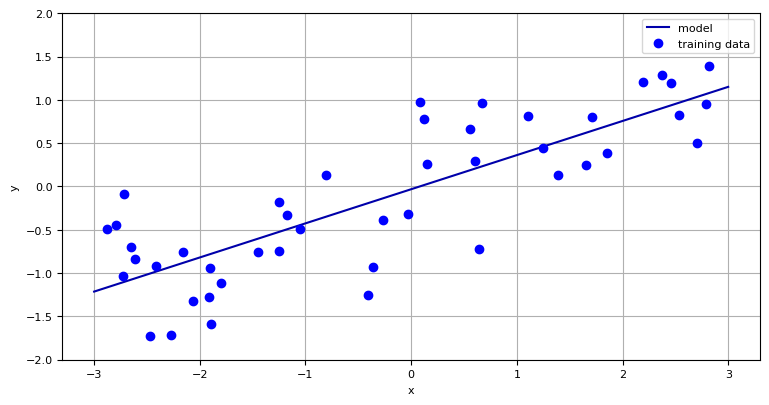

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mglearn.datasets import make_wave

Xw, yw = make_wave(n_samples=60)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, random_state=42)

line = np.linspace(-3, 3, 100).reshape(-1, 1)

lr = LinearRegression().fit(Xw_train, yw_train)
print("w_1: %f  w_0: %f" % (lr.coef_[0], lr.intercept_))

plt.figure(figsize=(6*fig_scale, 3*fig_scale))
plt.plot(line, lr.predict(line), lw=fig_scale)
plt.plot(Xw_train, yw_train, 'o', c='b')
#plt.plot(X_test, y_test, '.', c='r')
ax = plt.gca()
ax.grid(True)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(["model", "training data"], loc="best");

### Régression linéaire (alias moindres carrés ordinaires)
* La fonction de perte est la _somme des erreurs quadratiques_ (SSE) (ou résidus) entre les prédictions $\hat{y}_i$ (rouge) et les véritables cibles de régression $y_i$ (bleu) sur l'ensemble d'apprentissage.

$$\mathcal{L}_{SSE} = \sum_{n=1}^{N} (y_n-\hat{y}_n)^2 = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2$$ 

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_least_squares.png" alt="ml" style="margin: 0 auto; width: 750px;"/>

#### Résolution des moindres carrés ordinaires
* Problème d'optimisation convexe avec une solution unique en forme fermée :
    
    $$w^{*} = (X^{T}X)^{-1} X^T Y$$
    
    * Ajouter une colonne de 1 devant X pour obtenir $w_0$.
    * Lent. La complexité temporelle est quadratique en fonction du nombre de caractéristiques : $\mathcal{O}(p^2n)$
        * X a $n$ lignes, $p$ caractéristiques, donc $X^{T}X$ a une dimensionnalité $p \cdot p$
    * Ne fonctionne que si $n>p$
* Descente en gradient
    * Plus rapide pour les ensembles de données de grande taille et/ou de haute dimension
    * Lorsque $X^{T}X$ ne peut pas être calculé ou prend trop de temps ($p$ ou $n$ est trop grand)
    * Lorsque vous souhaitez avoir plus de contrôle sur le processus d'apprentissage
**Très facilement surajouté**.
    * Les coefficients $w$ deviennent très importants (forte inclinaison/déclinaison).
    * Une petite modification de l'entrée *x* entraîne une sortie très différente *y*. 
    * Pas d'hyperparamètres qui contrôlent la complexité du modèle

#### Descente de gradient
Commencer avec un ensemble initial et aléatoire de poids : $\mathbf{w}^0$

* Étant donné une fonction de perte différentiable $\mathcal{L}$ (par ex.

* Étant donné une fonction de perte différentiable $\mathcal{L}$ (par exemple $\mathcal{L}_{SSE}$), calculer $\nabla \mathcal{L}$.
Pour les moindres carrés : $\frac{\partial \mathcal{L}_{SSE}}{\partial w_i}(\mathbf{w}) = -2\sum_{n=1}^{N} (y_n-\hat{y}_n) x_{n,i}$ 

* Si l'élément $X_{:, i}$ est un élément d'information, $\mathcal{L}$ est un élément d'information.

* Si la caractéristique $X_{ :,i}$ est associée à des erreurs importantes, le gradient par rapport à $w_i$ sera important.
    
* Mettre légèrement à jour _tous_ les poids (par _la taille du pas_ ou _le taux d'apprentissage_ $\eta$) dans le sens de la "descente".

* Règle de base de mise à jour (étape s) : 

    $$\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L}(\mathbf{w}^s)$$

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_gradient_descent.jpg" alt="ml" style="width: 700px;"/>

* Hyperparamètres importants
    * Taux d'apprentissage
        * Trop petit : convergence lente. Trop grand : divergence possible
    * Nombre maximal d'itérations
        * Trop petit : pas de convergence. Trop grand : gaspillage de ressources
    * Décroissance du taux d'apprentissage avec un taux de décroissance $k$
        * Par exemple, exponentiel ($\eta^{s+1} = \eta^{0} e^{-ks}$), temps inverse ($\eta^{s+1} = \frac{\eta^{s}}{1+ks}$),...
    * De nombreuses méthodes plus avancées pour contrôler le taux d'apprentissage (voir plus loin)
        * Techniques adaptatives : dépendent de l'amélioration de la perte lors de l'étape précédente

In [6]:
import math
# Fonction convexe pour représenter la loss
def l_fx(x):
    return (x * 4)**2 
# Derivée pour calculer le gradient
def l_dfx0(x0):
    return 8 * x0

@interact
def plot_learning_rate(learn_rate=(0.01,0.4,0.01), exp_decay=False):
    w = np.linspace(-1,1,101)
    f = [l_fx(i) for i in w]
    w_current = -0.75
    learn_rate_current = learn_rate
    fw = [] # weight values
    fl = [] # loss values
    for i in range(10):
        fw.append(w_current)
        fl.append(l_fx(w_current))
        # Decay
        if exp_decay:
            learn_rate_current = learn_rate * math.exp(-0.3*i)
        # Update rule
        w_current = w_current - learn_rate_current * l_dfx0(w_current)
    fig, ax = plt.subplots(figsize=(5*fig_scale,3*fig_scale))
    ax.set_xlabel('w')
    ax.set_xticks([])
    ax.set_ylabel('loss')
    ax.plot(w, f, lw=2*fig_scale, ls='-', c='k', label='Loss')
    ax.plot(fw, fl, '--bo', lw=2*fig_scale, markersize=3)
    plt.ylim(-1,16)
    plt.xlim(-1,1)

interactive(children=(FloatSlider(value=0.2, description='learn_rate', max=0.4, min=0.01, step=0.01), Checkbox…

In [7]:
if not interactive:
    plot_learning_rate(learn_rate=0.21, exp_decay=False)

In [8]:
import tensorflow as tf
import tensorflow_addons as tfa

# Toy surface
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Tensorflow optimizers
sgd = tf.optimizers.SGD(0.01)
lr_schedule = tf.optimizers.schedules.ExponentialDecay(0.02,decay_steps=100,decay_rate=0.96)
sgd_decay = tf.optimizers.SGD(learning_rate=lr_schedule)

optimizers = [sgd, sgd_decay]
opt_names = ['sgd', 'sgd_decay']
cmap = plt.cm.get_cmap('tab10')
colors = [cmap(x/10) for x in range(10)]

# Training
all_paths = []
for opt, name in zip(optimizers, opt_names):
    x = tf.Variable(0.8)
    y = tf.Variable(1.6)

    x_history = []
    y_history = []
    loss_prev = 0.0
    max_steps = 100
    for step in range(max_steps):
        with tf.GradientTape() as g:
            loss = f(x, y)
            x_history.append(x.numpy())
            y_history.append(y.numpy())
            grads = g.gradient(loss, [x, y])
            opt.apply_gradients(zip(grads, [x, y]))

    if np.abs(loss_prev - loss.numpy()) < 1e-6:
        break
    loss_prev = loss.numpy()
    x_history = np.array(x_history)
    y_history = np.array(y_history)
    path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
    all_paths.append(path)

2024-06-19 12:45:48.267013: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-19 12:45:48.577864: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 12:45:48.577935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 12:45:48.631886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-19 12:45:48.747238: I tensorflow/core/platform/cpu_feature_guar

In [9]:
from matplotlib.colors import LogNorm
import tensorflow as tf

# Toy surface
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Tensorflow optimizers
sgd = tf.optimizers.SGD(0.01)
lr_schedule = tf.optimizers.schedules.ExponentialDecay(0.02,decay_steps=100,decay_rate=0.96)
sgd_decay = tf.optimizers.SGD(learning_rate=lr_schedule)

optimizers = [sgd, sgd_decay]
opt_names = ['sgd', 'sgd_decay']
cmap = plt.cm.get_cmap('tab10')
colors = [cmap(x/10) for x in range(10)]

# Training
all_paths = []
for opt, name in zip(optimizers, opt_names):
    x_init = 0.8
    x = tf.Variable(x_init)
    y_init = 1.6
    y = tf.Variable(y_init)

    x_history = []
    y_history = []
    z_prev = 0.0
    max_steps = 100
    for step in range(max_steps):
        with tf.GradientTape() as g:
            z = f(x, y)
            x_history.append(x.numpy())
            y_history.append(y.numpy())
            dz_dx, dz_dy = g.gradient(z, [x, y])
            opt.apply_gradients(zip([dz_dx, dz_dy], [x, y]))

    if np.abs(z_prev - z.numpy()) < 1e-6:
        break
    z_prev = z.numpy()
    x_history = np.array(x_history)
    y_history = np.array(y_history)
    path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
    all_paths.append(path)
        
# Plotting
number_of_points = 50
margin = 4.5
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
x_min = 0. - 2
x_max = 0. + 3.5
y_min = 0. - 3.5
y_max = 0. + 2
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

def plot_optimizers(ax, iterations, optimizers):
    ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet, linewidths=fig_scale, zorder=-1)
    ax.plot(*minima, 'r*', markersize=20*fig_scale)
    for name, path, color in zip(opt_names, all_paths, colors):
        if name in optimizers:
            p = path[:,:iterations]
            ax.plot([], [], color=color, label=name, lw=3*fig_scale, linestyle='-')
            ax.quiver(p[0,:-1], p[1,:-1], p[0,1:]-p[0,:-1], p[1,1:]-p[1,:-1], scale_units='xy', angles='xy', scale=1, color=color, lw=4)


    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.legend(loc='lower left', prop={'size': 15*fig_scale}) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()

In [10]:
from decimal import *

# Training for momentum
all_lr_paths = []
lr_range = [0.005 * i for i in range(0,10)]
for lr in lr_range:
    opt = tf.optimizers.SGD(lr, nesterov=False)

    x_init = 0.8
    x = tf.compat.v1.get_variable('x', dtype=tf.float32, initializer=tf.constant(x_init))
    y_init = 1.6
    y = tf.compat.v1.get_variable('y', dtype=tf.float32, initializer=tf.constant(y_init))

    x_history = []
    y_history = []
    z_prev = 0.0
    max_steps = 100
    for step in range(max_steps):
        with tf.GradientTape() as g:
            z = f(x, y)
            x_history.append(x.numpy())
            y_history.append(y.numpy())
            dz_dx, dz_dy = g.gradient(z, [x, y])
            opt.apply_gradients(zip([dz_dx, dz_dy], [x, y]))

    if np.abs(z_prev - z.numpy()) < 1e-6:
        break
    z_prev = z.numpy()
    x_history = np.array(x_history)
    y_history = np.array(y_history)
    path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
    all_lr_paths.append(path)
    
# Plotting
number_of_points = 50
margin = 4.5
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
x_min = 0. - 2
x_max = 0. + 3.5
y_min = 0. - 3.5
y_max = 0. + 2
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

def plot_learning_rate_optimizers(ax, iterations, lr):
    ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet, linewidths=fig_scale, zorder=-1)
    ax.plot(*minima, 'r*', markersize=20*fig_scale)
    for path, lrate in zip(all_lr_paths, lr_range):
        if round(lrate,3) == lr:
            p = path[:,:iterations]
            ax.plot([], [], color='b', label="Learning rate {}".format(lr), lw=3*fig_scale, linestyle='-')
            ax.quiver(p[0,:-1], p[1,:-1], p[0,1:]-p[0,:-1], p[1,1:]-p[1,:-1], scale_units='xy', angles='xy', scale=1, color='b', lw=4)


    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.legend(loc='lower left', prop={'size': 15*fig_scale}) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()

**Effet du learning rate**

In [11]:
@interact
def plot_lr(iterations=(1,100,1), learning_rate=(0.01,0.04,0.005)):
    fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
    plot_learning_rate_optimizers(ax,iterations,learning_rate)
    
if not interactive:
    plot_lr(iterations=50, learning_rate=0.02)

interactive(children=(IntSlider(value=50, description='iterations', min=1), FloatSlider(value=0.025, descripti…

**Effet du de la décroissance du learning rate**

In [12]:
@interact
def compare_optimizers(iterations=(1,100,1), optimizer1=opt_names, optimizer2=opt_names):
    fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
    plot_optimizers(ax,iterations,[optimizer1,optimizer2])
    
if not interactive:
    compare_optimizers(iterations=50, optimizer1="sgd", optimizer2="sgd_decay")

interactive(children=(IntSlider(value=50, description='iterations', min=1), Dropdown(description='optimizer1',…

En deux dimensions:
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_gradient_descent_2D.png" alt="ml" style="width: 900px;"/>

* Vous pouvez être bloqué dans des minima locaux (si la perte n'est pas entièrement convexe).
    * Si vous avez de nombreux paramètres de modèle, cela est moins probable.
    * Vous trouverez toujours un moyen de descendre dans une certaine direction.
    * Les modèles comportant de nombreux paramètres trouvent généralement de bons minima locaux.

* Intuition : marcher en descente en utilisant uniquement la pente que l'on "sent" à proximité.

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_gradient_descent_hill.png" alt="ml" style="width: 1200px;"/>

(Image de A. Karpathy)

#### Descente stochastique de gradient (SGD)
* Calcul des gradients non pas sur l'ensemble des données, mais sur un seul point de données $i$ à la fois.
    * Descente de gradient : $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L}(\mathbf{w}^s) = \mathbf{w}^s-\frac{\eta}{n} \sum_{i=1}^{n} \nabla \mathcal{L_i}(\mathbf{w}^s)$
    * Descente stochastique de gradient : $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L_i}(\mathbf{w}^s)$
* De nombreuses variantes plus lisses, par exemple
    * Minibatch SGD : calcul du gradient sur des lots de données : $\mathbf{w}^{s+1} = \mathbf{w}^s-\frac{\eta}{B} \sum_{i=1}^{B} \nabla \mathcal{L_i}(\mathbf{w}^s)$
    * Descente stochastique moyenne de gradient ([SAG](https://link.springer.com/content/pdf/10.1007/s10107-016-1030-6.pdf), [SAGA](https://proceedings.neurips.cc/paper/2014/file/ede7e2b6d13a41ddf9f4bdef84fdc737-Paper.pdf)). Avec $i_s dans [1,n]$ choisi aléatoirement par itération :
        * Gradient incrémental : $\mathbf{w}^{s+1} = \mathbf{w}^s-\frac{\eta}{n} \sum_{i=1}^{n} v_i^s$ avec $v_i^s = \begin{cases}\nabla \mathcal{L_i}(\mathbf{w}^s) & i = i_s \\ v_i^{s-1} & \text{autre} \end{cases}$
        
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/08_SGD.png" alt="ml" style="float: left; width: 600px;"/>

#### En pratique
* La régression linéaire peut être trouvée dans `sklearn.linear_model`. Nous allons l'évaluer sur le jeu de données Boston Housing.
    * `LinearRegression` utilise une solution de forme fermée, `SGDRegressor` avec `loss='squared_loss'` utilise Stochastic Gradient Descent
    * Les grands coefficients signalent un surapprentissage
    * Le score de test est beaucoup plus bas que le score d'entraînement

``` python
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
```

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_B, y_B = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, random_state=0)

lr = LinearRegression().fit(X_B_train, y_B_train)

In [14]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14 ]
Bias (intercept): 30.934563673642813


In [15]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_B_train, y_B_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_B_test, y_B_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61



### Régression Ridge

* Ajoute un terme de pénalité à la fonction de perte des moindres carrés :

$$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} w_i^2$$

* Le modèle est pénalisé s'il utilise des coefficients importants ($w$)
    * Chaque caractéristique doit avoir le moins d'effet possible sur le résultat. 
    * Nous ne voulons pas pénaliser $w_0$, donc nous le laissons de côté.
* Régularisation : restreindre explicitement un modèle pour éviter un surajustement. 
    * Appelée régularisation L2 parce qu'elle utilise la norme L2 : $\sum w_i^2$.
* La force de la régularisation peut être contrôlée avec l'hyperparamètre $\alpha$.
    * L'augmentation de $\alpha$ entraîne une plus grande régularisation (ou un rétrécissement). La valeur par défaut est 1,0.
* Toujours convexe. Peut être optimisé de différentes manières :
    * Solution de forme fermée (a.k.a. Cholesky) : $w^{*} = (X^{T}X + \alpha I)^{-1} X^T Y$
    * Descente de gradient et variantes, par exemple le gradient moyen stochastique (SAG, SAGA)
        * Gradient conjugué (CG) : chaque nouveau gradient est influencé par les précédents.
    * Utiliser Cholesky pour les petits ensembles de données, la descente de gradient pour les plus grands.
   

#### En pratique
```python
from sklearn.linear_model import Ridge
lr = Ridge().fit(X_train, y_train)
```

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_B_train, y_B_train)
print("Weights (coefficients): {}".format(ridge.coef_[0:40]))
print("Bias (intercept): {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_B_train, y_B_train)))
print("Test set score: {:.2f}".format(ridge.score(X_B_test, y_B_test)))

Weights (coefficients): [-1.414 -1.557 -1.465 -0.127 -0.079  8.332  0.255 -4.941  3.899 -1.059
 -1.584  1.051 -4.012  0.334  0.004 -0.849  0.745 -1.431 -1.63  -1.405
 -0.045 -1.746 -1.467 -1.332 -1.692 -0.506  2.622 -2.092  0.195 -0.275
  5.113 -1.671 -0.098  0.634 -0.61   0.04  -1.277 -2.913  3.395  0.792]
Bias (intercept): 21.3905259586098
Training set score: 0.89
Test set score: 0.75


Le score de l'ensemble de test est plus élevé et le score de l'ensemble d'apprentissage est plus faible : moins de surapprentissage !

* Nous pouvons tracer les valeurs de poids pour différents niveaux de régularisation afin d'explorer l'effet de $\alpha$.
* L'augmentation de la régularisation diminue les valeurs des coefficients, mais jamais jusqu'à 0.

In [17]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

@interact
def plot_ridge(alpha=(0,10.0,0.05)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.5*fig_scale))
    ax.plot(r.coef_, 'o', markersize=3)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=0.05), Output()), _dom_classe…

In [18]:
if not interactive:
    for alpha in [0.1, 10]:
        plot_ridge(alpha)

* Lorsque nous traçons les scores de formation et de test pour chaque valeur de $\alpha$, nous constatons un point idéal autour de $\alpha=0,2$.
    * Les modèles avec une valeur $\alpha$ plus petite sont surajustés.
    * Les modèles avec des $\alpha$ plus grands sont sous-ajustés.

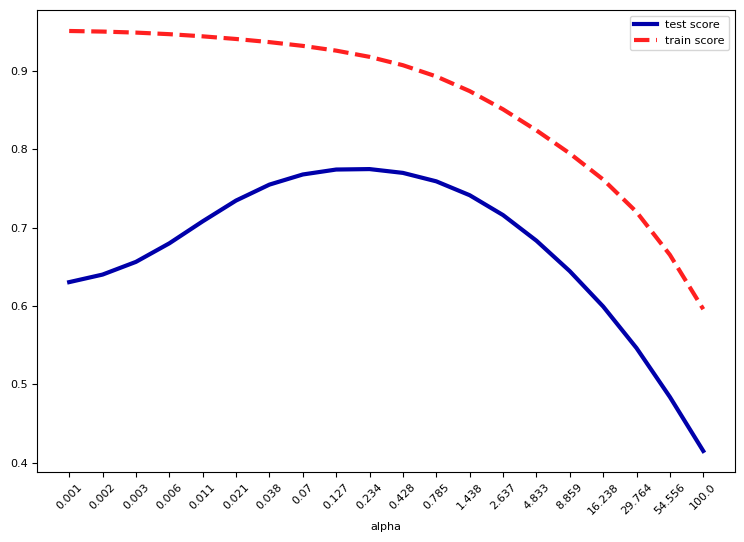

In [19]:
alpha=np.logspace(-3,2,num=20)
ai = list(range(len(alpha)))
test_score=[]
train_score=[]
for a in alpha:
    r = Ridge(alpha=a).fit(X_B_train, y_B_train)
    test_score.append(r.score(X_B_test, y_B_test))
    train_score.append(r.score(X_B_train, y_B_train))
fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
ax.set_xticks(range(20))
ax.set_xticklabels(np.round(alpha,3))
ax.set_xlabel('alpha')
ax.plot(test_score, lw=2*fig_scale, label='test score')
ax.plot(train_score, lw=2*fig_scale, label='train score')
ax.legend()
plt.xticks(rotation=45);

### Autres moyens de réduire l'overfitting
* Ajouter plus de données d'entraînement : avec suffisamment de données d'entraînement, la régularisation devient moins importante.
    * Les moindres carrés ordinaires et les moindres carrés de Ridge auront les mêmes performances.
* Utiliser moins de caractéristiques : supprimer celles qui ne sont pas importantes ou trouver une intégration à faible dimension (par exemple, l'ACP).
    * Moins de coefficients à apprendre, ce qui réduit la flexibilité du modèle.
* La mise à l'échelle des données est généralement utile (et modifie la valeur optimale de $\alpha$)

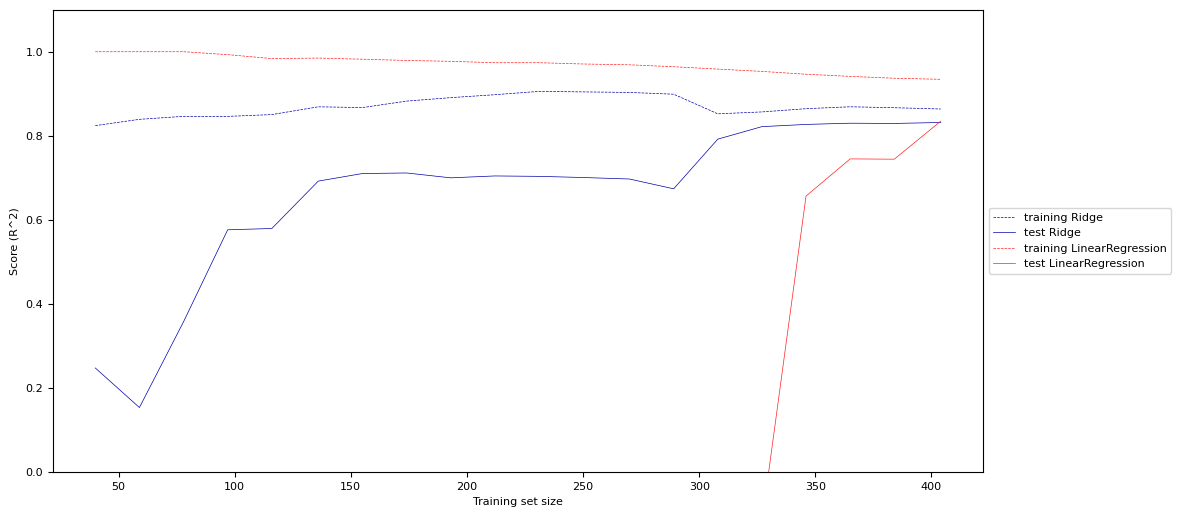

In [20]:
fig, ax = plt.subplots(figsize=(10*fig_scale,4*fig_scale))
mglearn.plots.plot_ridge_n_samples(ax)

### Lasso (Least Absolute Shrinkage and Selection Operator)
* Ajoute un terme de pénalité différent à la somme des moindres carrés :

$$\mathcal{L}_{Lasso} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} |w_i|$$

* Appelée régularisation L1 parce qu'elle utilise la norme L1
    * De nombreux poids seront exactement égaux à 0
* Même paramètre $\alpha$ pour contrôler la force de la régularisation. 
    * Il y aura à nouveau un "point idéal" en fonction des données.
* Pas de solution de forme fermée
* Convexe, mais plus strictement convexe, et non différentiable
    * Les poids peuvent être optimisés à l'aide de la _descente de coordonnées_.

Analyser ce qu'il advient des poids :
* L1 préfère que les coefficients soient exactement nuls (modèles épars).
* Certaines caractéristiques sont totalement ignorées : sélection automatique des caractéristiques
* Comment pouvons-nous expliquer cela ?

In [21]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.5*fig_scale))
    ax.plot(r.coef_, 'o', markersize=6*fig_scale)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)), pad=0.5)
    ax.set_xlabel("Coefficient index", labelpad=0)
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

In [22]:
if not interactive:
    for alpha in [0.00001, 0.01]:
        plot_lasso(alpha)

#### Descente de coordonnées
- Alternative à la descente de gradient, prend en charge les fonctions de perte convexes non différentiables (par exemple $\mathcal{L}_{Lasso}$).
- À chaque itération, optimiser une seule coordonnée $w_i$ (trouver le minimum dans la direction de $x_i$)
    - Continuer avec une autre coordonnée, en utilisant une règle de sélection (par exemple, round robin).
- Itérations plus rapides. Il n'est pas nécessaire de choisir une taille de pas (taux d'apprentissage).
- Peut converger plus lentement. Ne peut pas être parallélisé.

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_cd.png" alt="ml" style="width: 700px;"/>

#### Descente de coordonnées avec Lasso

- Rappelons que $\mathcal{L}_{Lasso} = \mathcal{L}_{SSE} + \alpha \sum_{i=1}^{p} |w_i|$ 
- Pour un $w_i$ : $\mathcal{L}_{Lasso}(w_i) = \mathcal{L}_{SSE}(w_i) + \alpha |w_i|$
- Le terme L1 n'est pas différentiable mais convexe : on peut calculer le [_subgradient_](https://towardsdatascience.com/unboxing-lasso-regularization-with-proximal-gradient-method-ista-iterative-soft-thresholding-b0797f05f8ea) 
    - Unique aux points où $\mathcal{L}$ est différentiable, un intervalle de toutes les pentes possibles [a,b] où il ne l'est pas.
    - Pour $|w_i|$, le sous-gradient $\partial_{w_i} |w_i|$ = $\begin{cases}-1 & w_i<0\\N- [-1,1] & w_i=0 \\- 1 & w_i>0 \\ \end{cases}$

    - Sous-différentiel $\partial(f+g) = \partial f + \partial g$ si $f$ et $g$ sont tous deux convexes
- Pour trouver l'optimum du Lasso $w_i^{*}$, résoudre

    $$\begin{aligned} \partial_{w_i} \mathcal{L}_{Lasso}(w_i) &= \partial_{w_i} \mathcal{L}_{SSE}(w_i) + \partial_{w_i} \alpha |w_i| \\- 0 &= (w_i - \rho_i) + \alpha \cdot \partial_{w_i} |w_i| \\- w_i &= \rho_i - \alpha \cdot \partial_{w_i} |w_i| \end{aligned}$$.

    - Où $\rho_i$ est la partie de $\partial_{w_i} \mathcal{L}_{SSE}(w_i)$ excluant $w_i$ (supposons $z_i=1$ pour l'instant)
        - $\rho_i$ peut être considéré comme la $\mathcal{L}_{SSE}$ "solution" : $w_i = \rho_i$ si $\partial_{w_i} \mathcal{L}_{SSE}(w_i) = 0$ 
  $$\partial_{w_i} \mathcal{L}_{SSE}(w_i) = \partial_{w_i} \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 = z_i w_i -\rho_i $$ 

- Nous avons trouvé : $w_i = \rho_i - \alpha \cdot \partial_{w_i} |w_i|$
- La solution Lasso (https://xavierbourretsicotte.github.io/lasso_derivation.html) a la forme d'une _fonction de seuillage souple_ $S$

    $$w_i^* = S(\rho_i,\alpha) = \begin{cases} \rho_i + \alpha, & \rho_i < -\alpha \\ 0, & -\alpha < \rho_i < \alpha \\ \rho_i - \alpha, & \rho_i > \alpha \\ \end{cases}$$.
    
    - Les petits poids deviennent 0 : rareté !
    - Si les données ne sont pas normalisées, $w_i^* = \frac{1}{z_i}S(\rho_i,\alpha)$ avec la constante $z_i = \sum_{n=1}^{N} x_{ni}^2$.
- Solution de crête : $w_i = \rho_i - \alpha \cdot \partial_{w_i} w_i^2 = \rho_i - 2\alpha \cdot w_i$, donc $w_i^* = \frac{\rho_i}{1 + 2\alpha}$

In [23]:
@interact
def plot_rho(alpha=(0,2.0,0.05)):
    w = np.linspace(-2,2,101)
    r = w/(1+2*alpha)
    l = [x+alpha if x <= -alpha else (x-alpha if x > alpha else 0) for x in w]
    fig, ax = plt.subplots(figsize=(6*fig_scale,3*fig_scale))
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$w^{*}$')
    ax.plot(w, w, lw=2*fig_scale, c='g', label='Ordinary Least Squares (SSE)')
    ax.plot(w, r, lw=2*fig_scale, c='b', label='Ridge with alpha={}'.format(alpha))
    ax.plot(w, l, lw=2*fig_scale, c='r', label='Lasso with alpha={}'.format(alpha))
    ax.legend()
    plt.grid()

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.05), Output()), _dom_classes…

In [24]:
if not interactive:
    plot_rho(alpha=1)

### Interpretation de L1 et L2 loss
- L1 et L2 en fonction des poids

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/L12_1.png" alt="ml" style="width: 900px;"/>

Perte par moindres carrés + L1 ou L2
- Le Lasso n'est pas différentiable au point 0
- Pour tout minimum des moindres carrés, L2 sera plus petit, et L1 sera plus probablement 0

In [25]:
def c_fx(x):
    fX = ((x * 2 - 1)**2) # Some convex function to represent the loss
    return fX/9 # Scaling
def c_fl2(x,alpha):
    return c_fx(x) + alpha * x**2
def c_fl1(x,alpha):
    return c_fx(x) + alpha * abs(x)
def l2(x,alpha):
    return alpha * x**2
def l1(x,alpha):
    return alpha * abs(x)

@interact
def plot_losses(alpha=(0,1.0,0.05)):
    w = np.linspace(-1,1,101)
    f = [c_fx(i) for i in w]
    r = [c_fl2(i,alpha) for i in w]
    l = [c_fl1(i,alpha) for i in w]
    rp = [l2(i,alpha) for i in w]
    lp = [l1(i,alpha) for i in w]
    fig, ax = plt.subplots(figsize=(8*fig_scale,4*fig_scale))
    ax.set_xlabel('w')
    ax.set_ylabel('loss')
    ax.plot(w, rp, lw=1.5*fig_scale, ls=':', c='b', label='L2 with alpha={}'.format(alpha))
    ax.plot(w, lp, lw=1.5*fig_scale, ls=':', c='r', label='L1 with alpha={}'.format(alpha))
    ax.plot(w, f, lw=2*fig_scale, ls='-', c='k', label='Least Squares loss')
    ax.plot(w, r, lw=2*fig_scale, ls='-', c='b', label='Loss + L2 (Ridge)'.format(alpha))
    ax.plot(w, l, lw=2*fig_scale, ls='-', c='r', label='Loss + L1 (Lasso)'.format(alpha))
    opt_f = np.argmin(f)
    ax.scatter(w[opt_f], f[opt_f], c="k", s=50*fig_scale)
    opt_r = np.argmin(r)
    ax.scatter(w[opt_r], r[opt_r], c="b", s=50*fig_scale)
    opt_l = np.argmin(l)
    ax.scatter(w[opt_l], l[opt_l], c="r", s=50*fig_scale)
    ax.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(-0.1,1)
    plt.grid()

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, step=0.05), Output()), _dom_classes…

In [26]:
if not interactive:
    plot_losses(alpha=0.5)

- En 2D (pour 2 poids de modèle $w_1$ et $w_2$)
    - La perte la moins élevée au carré est une fonction convexe en 2D dans cet espace.
    - À titre d'illustration, supposons que la perte L1 = la perte L2 = 1
        - Perte L1 ($\Sigma |w_i|$) : chaque {$w_1, w_2$} tombe sur le diamant
        - Perte L2 ($\Sigma w_i^2$) : chaque {$w_1, w_2$} tombe sur le cercle
    - Pour L1, la perte est minimisée si $w_1$ ou $w_2$ est 0 (c'est rarement le cas pour L2)

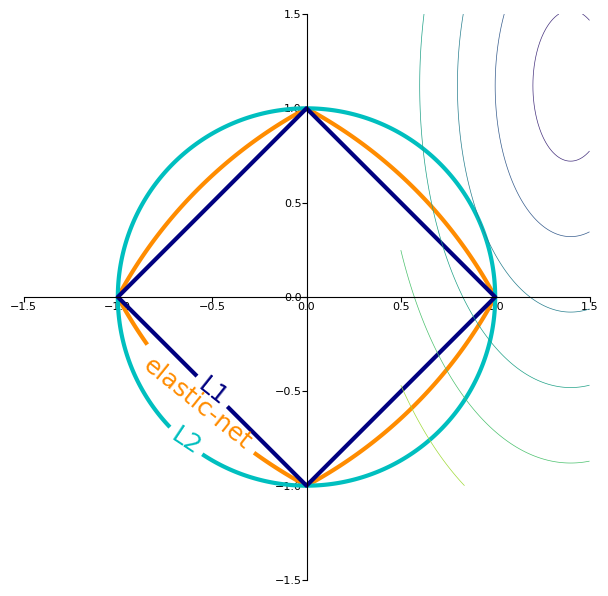

In [27]:
def plot_loss_interpretation():
    line = np.linspace(-1.5, 1.5, 1001)
    xx, yy = np.meshgrid(line, line)

    l2 = xx ** 2 + yy ** 2
    l1 = np.abs(xx) + np.abs(yy)
    rho = 0.7
    elastic_net = rho * l1 + (1 - rho) * l2

    plt.figure(figsize=(5*fig_scale, 4*fig_scale))
    ax = plt.gca()

    elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1], linewidths=2*fig_scale, colors="darkorange")
    l2_contour = plt.contour(xx, yy, l2, levels=[1], linewidths=2*fig_scale, colors="c")
    l1_contour = plt.contour(xx, yy, l1, levels=[1], linewidths=2*fig_scale, colors="navy")
    ax.set_aspect("equal")
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    plt.clabel(elastic_net_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'elastic-net'}, manual=[(-0.6, -0.6)])
    plt.clabel(l2_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L2'}, manual=[(-0.5, -0.5)])
    plt.clabel(l1_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L1'}, manual=[(-0.5, -0.5)])

    x1 = np.linspace(0.5, 1.5, 100)
    x2 = np.linspace(-1.0, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.sqrt(np.square(X1/2-0.7) + np.square(X2/4-0.28))
    cp = plt.contour(X1, X2, Y)
    #plt.clabel(cp, inline=1, fontsize=10)
    ax.tick_params(axis='both', pad=0)

    plt.tight_layout()
    plt.show()
plot_loss_interpretation()

### Elastic-Net

* Ajoute les régularisations L1 et L2 :

$$\mathcal{L}_{Elastic} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2$$. 

* $\rho$ est le rapport L1
    * Avec $\rho=1$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Lasso}$ * Avec $\rho=0$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Lasso}$
    * Avec $\rho=0$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Ridge}$
    * 0$ < \rho < 1$ établit un compromis entre L1 et L2.
* Permet l'apprentissage de modèles épars (comme Lasso) tout en conservant les avantages de la régularisation L2.
    * Par exemple, si deux caractéristiques sont corrélées, Lasso en choisira probablement une au hasard, Elastic-Net gardera les deux. 
* Les poids peuvent être optimisés à l'aide de la descente de coordonnées (similaire à Lasso). 

### Autres fonctions de perte pour la régression
* Perte de Huber : passe d'une perte au carré à une perte linéaire après une valeur $\epsilon$.
    * Plus robuste contre les valeurs aberrantes
* Insensible à l'epsilon : ignore les erreurs inférieures à $\epsilon$, et linéaire au-delà.
    * Vise à ajuster la fonction de manière à ce que les résidus soient au maximum de $\epsilon$.
    * Également connue sous le nom de régression vectorielle de support (`SVR` dans sklearn)
* Insensible au carré d'Epsilon : ignore les erreurs inférieures à $\epsilon$, et au carré au-delà.
* Ces problèmes peuvent tous être résolus par la descente stochastique du gradient.
    * `SGDRegressor` dans sklearn

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/huber.png" alt="ml" style="width: 500px;"/>

## Modèles linéaires pour la classification
L'objectif est de trouver un hyperplan qui sépare les exemples de chaque classe.  
Pour la classification binaire (2 classes), nous cherchons à ajuster la fonction suivante : 

$\hat{y} = w_1 * x_1 + w_2 * x_2 +... + w_p * x_p + w_0 > 0$  
    
Lorsque $\hat{y}<0$, prédire la classe -1, sinon prédire la classe +1

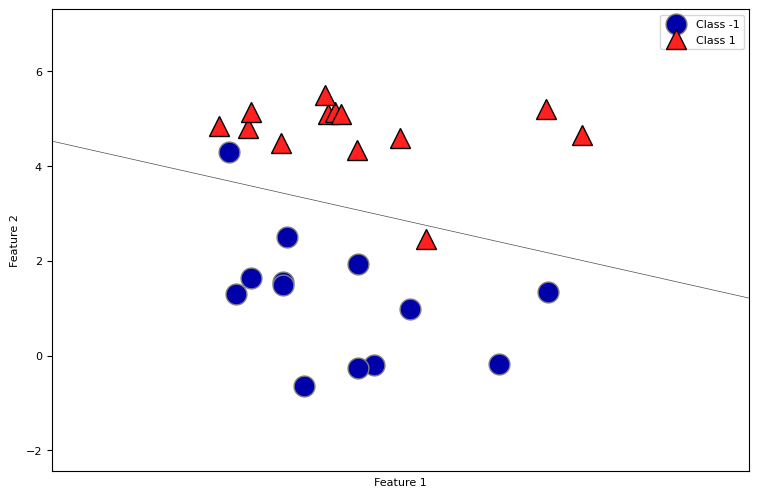

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

Xf, yf = mglearn.datasets.make_forge()
fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
clf = LogisticRegression().fit(Xf, yf)
mglearn.tools.plot_2d_separator(clf, Xf,
                                ax=ax, alpha=.7, cm=mglearn.cm2)
mglearn.discrete_scatter(Xf[:, 0], Xf[:, 1], yf, ax=ax, s=10*fig_scale)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend(['Class -1','Class 1']);

* Il existe de nombreux algorithmes de classification linéaire, qui diffèrent par la fonction de perte, les techniques de régularisation et la méthode d'optimisation.

* Techniques les plus courantes :
    * Convertir les classes cibles {neg,pos} en {0,1} et les traiter comme une tâche de régression
        * Régression logistique (perte logarithmique)
        * Classification en crête (moindres carrés + perte L2)
    * Trouver l'hyperplan qui maximise la marge entre les classes
        * Machines à vecteurs de support linéaires (perte de charnière)
    * Réseaux neuronaux sans fonctions d'activation
        * Perceptron (perte Perceptron)
    * SGDClassifier : peut se comporter comme n'importe lequel d'entre eux en choisissant la fonction de perte
        * Hinge, Log, Modified_huber, Squared_hinge, Perceptron

### Régression logistique
* Vise à prédire la _probabilité_ qu'un point appartienne à la classe positive.
* Convertit les valeurs cibles {négatives (bleu), positives (rouge)} en {0,1}.
* Ajuste une fonction _logistique_ (ou _sigmoïde_ ou courbe _S_) à travers ces points.
    * Application de (-Inf,Inf) en une probabilité [0,1].
    
    $$ \hat{y} = \textrm{logistic}(f_{\theta}(\mathbf{x})) = \frac{1}{1+e^{-f_{\theta}(\mathbf{x})}} $$
    
* E.g. en 1D: $ \textrm{logistic}(x_1w_1+w_0) = \frac{1}{1+e^{-x_1w_1-w_0}} $

In [29]:
def sigmoid(x,w1,w0):
    return 1 / (1 + np.exp(-(x*w1+w0)))

@interact
def plot_logreg(w0=(-10.0,5.0,1),w1=(-1.0,3.0,0.3)):
    fig, ax = plt.subplots(figsize=(8*fig_scale,3*fig_scale))
    red = [Xf[i, 1] for i in range(len(yf)) if yf[i]==1]
    blue = [Xf[i, 1] for i in range(len(yf)) if yf[i]==0]
    ax.scatter(red, [1]*len(red), c='r', label='Positive class')
    ax.scatter(blue, [0]*len(blue), c='b', label='Negative class')
    x = np.linspace(min(-1, -w0/w1),max(6, -w0/w1))
    ax.plot(x,sigmoid(x,w1,w0),lw=2*fig_scale,c='g', label='logistic(x*w1+w0)'.format(np.round(w0,2),np.round(w1,2)))
    ax.axvline(x=(-w0/w1), ymin=0, ymax=1, label='Decision boundary')
    ax.plot(x,x*w1+w0,lw=2*fig_scale,c='k',linestyle=':', label='y=x*w1+w0')
    ax.set_xlabel("Feature")
    ax.set_ylabel("y")
    ax.set_ylim(-0.05,1.05)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height]);

interactive(children=(FloatSlider(value=-3.0, description='w0', max=5.0, min=-10.0, step=1.0), FloatSlider(val…

In [30]:
if not interactive:
    # fitted solution
    clf2 = LogisticRegression(C=100).fit(Xf[:, 1].reshape(-1, 1), yf)
    w0 = clf2.intercept_
    w1 = clf2.coef_[0][0]
    plot_logreg(w0=w0,w1=w1)

* Fitted solution to our 2D example:
    * To get a binary prediction, choose a probability threshold (e.g. 0.5)

In [31]:
lr_clf = LogisticRegression(C=100).fit(Xf, yf)

def sigmoid2d(x1,x2,w0,w1,w2):
    return 1 / (1 + np.exp(-(x2*w2+x1*w1+w0)))

@interact
def plot_logistic_fit(rotation=(0,360,10)):
    w0 = lr_clf.intercept_
    w1 = lr_clf.coef_[0][0]
    w2 = lr_clf.coef_[0][1]

    # plot surface of f
    fig = plt.figure(figsize=(7*fig_scale,5*fig_scale))
    ax = plt.axes(projection="3d")
    x0 = np.linspace(8, 16, 30)
    x1 = np.linspace(-1, 6, 30)
    X0, X1 = np.meshgrid(x0, x1)
    
    # Surface
    ax.plot_surface(X0, X1, sigmoid2d(X0, X1, w0, w1, w2), rstride=1, cstride=1,
                    cmap='bwr', edgecolor='none',alpha=0.5,label='sigmoid')
    # Points
    c=['b','r']
    ax.scatter3D(Xf[:, 0], Xf[:, 1], yf, c=[c[i] for i in yf], s=10*fig_scale)
    
    # Decision boundary
    # x2 = -(x1*w1 + w0)/w2
    ax.plot3D(x0,-(x0*w1 + w0)/w2,[0.5]*len(x0), lw=1*fig_scale, c='k', linestyle=':')
    z = np.linspace(0, 1, 31)
    XZ, Z = np.meshgrid(x0, z)
    YZ = -(XZ*w1 + w0)/w2    
    ax.plot_wireframe(XZ, YZ, Z, rstride=5, lw=1*fig_scale, cstride=5, alpha=0.3, color='k',label='decision boundary')
    ax.tick_params(axis='both', width=0, labelsize=10*fig_scale, pad=-4)

    ax.set_xlabel('x0', labelpad=-6)
    ax.set_ylabel('x1', labelpad=-6)
    ax.get_zaxis().set_ticks([])
    ax.view_init(30, rotation) # Use this to rotate the figure
    plt.tight_layout()
    #plt.legend() # Doesn't work yet, bug in matplotlib
    plt.show()

interactive(children=(IntSlider(value=180, description='rotation', max=360, step=10), Output()), _dom_classes=…

In [32]:
if not interactive:
    plot_logistic_fit(rotation=150)

#### Fonction de perte : Entropie croisée
* Les modèles qui renvoient des probabilités de classe peuvent utiliser la _perte d'entropie croisée_.
    
    $$\mathcal{L_{log}}(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = - \sum_{n=1}^{N} \sum_{c=1}^{C} p_{n,c} log(q_{n,c}) $$
    
    * Également connu sous le nom de perte logarithmique, perte logistique ou maximum de vraisemblance.
    * Basé sur les probabilités réelles $p$ (0 ou 1) et les probabilités prédites $q$ sur $N$ instances et $C$ classes
        * Cas binaire (C=2) : $\mathcal{L_{log}}(\mathbf{w}) = - \sum_{n=1}^{N} \big[ y_n log(\hat{y}_n) + (1-y_n) log(1-\hat{y}_n) \big]$
    * La pénalité (ou la surprise) croît de manière exponentielle lorsque la différence entre $p$ et $q$ augmente.
    * Souvent utilisé avec la perte L2 (ou L1) : $\mathcal{L_{log}}'(\mathbf{w}) = \mathcal{L_{log}}(\mathbf{w}) + \alpha \sum_{i} w_i^2 $

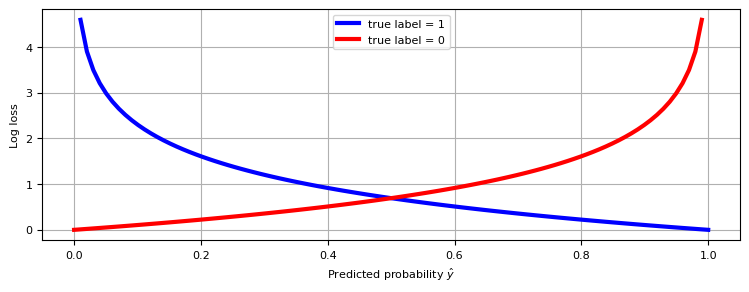

In [33]:
def cross_entropy(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(0,1,100)

ax.plot(x,cross_entropy(x, 1),lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,cross_entropy(x, 0),lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Predicted probability $\hat{y}$")
ax.set_ylabel("Log loss")
plt.grid()
plt.legend();

#### Méthodes d'optimisation (solveurs) pour la perte d'entropie croisée
* Descente de gradient (ne prend en charge que la régularisation L2)
    - La perte logarithmique est différentiable, nous pouvons donc utiliser la descente de gradient (stochastique).
    - Variantes, par exemple le gradient moyen stochastique (SAG, SAGA)
* Descente de coordonnées (prend en charge les régularisations L1 et L2)
    - Itération plus rapide, mais peut converger plus lentement, a des problèmes avec les points de selle.
    - Appelé `liblinear` dans sklearn. Ne peut pas fonctionner en parallèle.
* Newton-Rhapson ou Newton Gradient Conjugué (seulement L2) :
    - Utilise le Hessien $H = \big[\frac{\partial^2 \mathcal{L}}{\partial x_i \partial x_j} \big]$ : $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta H^{-1}(\mathbf{w}^s) \nabla \mathcal{L}(\mathbf{w}^s)$
    - Lent pour les grands ensembles de données. Fonctionne bien si l'espace de solution est (presque) convexe.
* Méthodes de Quasi-Newton (seulement L2)
    - Approximatives, plus rapides à calculer
    - Par exemple, Broyden-Fletcher-Goldfarb-Shanno (`lbfgs`) à mémoire limitée.
        - Par défaut dans sklearn pour la régression logistique
* [Quelques conseils sur le choix des solveurs](https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451)
    - La mise à l'échelle des données aide à la convergence, minimise les différences entre les solveurs

#### En pratique
* La régression logistique peut également être trouvée dans `sklearn.linear_model`.
    * L'hyperparamètre `C` est la force de régularisation _inverse_ : $C=\alpha^{-1}$.
    * `penalty` : type de régularisation : L1, L2 (par défaut), Elastic-Net, ou None
    * `solver` : newton-cg, lbfgs (par défaut), liblinear, sag, saga
* Augmentation de C : moins de régularisation, tentative de surajustement des points individuels

``` python
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1).fit(X_train, y_train)
```

In [34]:
from sklearn.linear_model import LogisticRegression

@interact
def plot_lr(C_log=(-3,4,0.1)):
    # Still using artificial data
    fig, ax = plt.subplots(figsize=(6*fig_scale,3*fig_scale))
    mglearn.discrete_scatter(Xf[:, 0], Xf[:, 1], yf, ax=ax, s=10*fig_scale)
    lr = LogisticRegression(C=10**C_log).fit(Xf, yf)
    w = lr.coef_[0]
    xx = np.linspace(7, 13)
    yy = (-w[0] * xx - lr.intercept_[0]) / w[1]
    ax.plot(xx, yy, c='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = {:.3f}, w1={:.3f}, w2={:.3f}".format(10**C_log,w[0],w[1]))
    ax.legend(loc="best");

interactive(children=(FloatSlider(value=0.0, description='C_log', max=4.0, min=-3.0), Output()), _dom_classes=…

In [35]:
if not interactive:
    plot_lr(C_log=(4))

* Analyser le comportement sur l'ensemble de données du cancer du sein
    * Sous-application si C est trop petit, sur-application si C est trop grand
    * Nous utilisons la validation croisée parce que l'ensemble de données est petit.

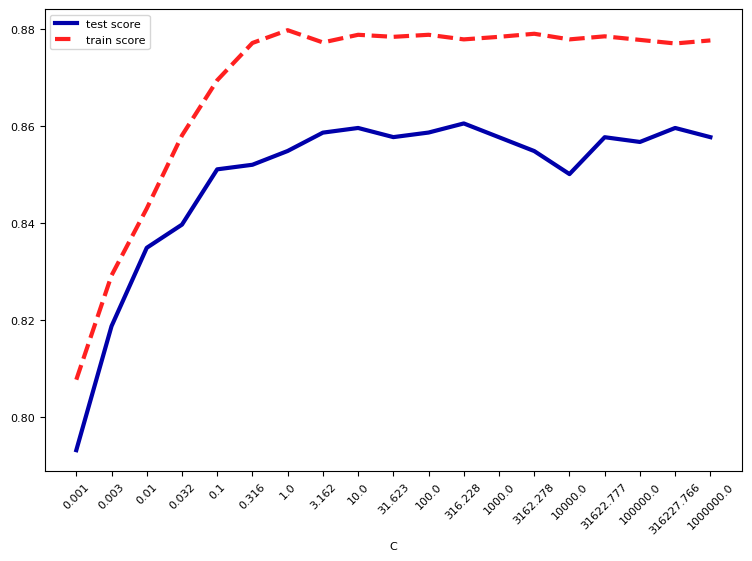

In [36]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_validate

spam_data = fetch_openml(name="qsar-biodeg", as_frame=True)
X_C, y_C = spam_data.data, spam_data.target

C=np.logspace(-3,6,num=19)
test_score=[]
train_score=[]
for c in C:
    lr = LogisticRegression(C=c)
    scores = cross_validate(lr,X_C,y_C,cv=10, return_train_score=True)
    test_score.append(np.mean(scores['test_score']))
    train_score.append(np.mean(scores['train_score']))
fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
ax.set_xticks(range(19))
ax.set_xticklabels(np.round(C,3))
ax.set_xlabel('C')
ax.plot(test_score, lw=2*fig_scale, label='test score')
ax.plot(train_score, lw=2*fig_scale, label='train score')
ax.legend()
plt.xticks(rotation=45);

* Encore une fois, choisir entre la régularisation L1 ou L2 (ou elastic-net)
* Small C overfits, L1 conduit à des modèles clairsemés

In [37]:
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, y_C, random_state=0)

@interact
def plot_logreg(C=(0.01,1000.0,0.1), penalty=['l1','l2']):
    r = LogisticRegression(C=C, penalty=penalty, solver='liblinear').fit(X_C_train, y_C_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.9*fig_scale))
    ax.plot(r.coef_.T, 'o', markersize=6*fig_scale)
    ax.set_title("C: {:.3f}, penalty: {}, score {:.2f} (training score {:.2f})".format(C, penalty, r.score(X_C_test, y_C_test), r.score(X_C_train, y_C_train)),pad=0)
    ax.set_xlabel("Coefficient index", labelpad=0)
    ax.set_ylabel("Coeff. magnitude", labelpad=0, fontsize=10*fig_scale)
    ax.tick_params(axis='both', pad=0)
    ax.hlines(0, 40, len(r.coef_)-1)
    ax.set_ylim(-10, 10)
    ax.set_xlim(0, 40);
    plt.tight_layout();

interactive(children=(FloatSlider(value=499.91, description='C', max=1000.0, min=0.01), Dropdown(description='…

In [38]:
if not interactive:
    plot_logreg(0.001, 'l2')
    plot_logreg(100, 'l2')
    plot_logreg(100, 'l1')

### Classification Ridge
* Au lieu de la perte logarithmique, nous pouvons également utiliser la perte de crête :
    
    $$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} w_i^2$$
    
* Dans ce cas, les valeurs cibles {négatives, positives} sont converties en {-1,1}.
* Peut être résolu de manière similaire à la régression Ridge :
    * Solution en forme fermée (a.k.a. Cholesky)
    * Descente de gradient et variantes
        * Gradient conjugué (CG) ou gradient moyen stochastique (SAG, SAGA).
    * Utiliser Cholesky pour les petits ensembles de données, la descente de gradient pour les plus grands.

### Machines à vecteurs de support
- Les limites de décision proches des points d'apprentissage peuvent mal se généraliser
    - Les points de test très similaires (proches) sont classés dans l'autre classe.
- Choisissez une limite aussi éloignée que possible des points d'apprentissage.
- Les __vecteurs de support__ sont les échantillons d'apprentissage les plus proches de l'hyperplan.
- La __marge__ est la distance entre l'hyperplan de séparation et les _vecteurs de support_.
- Notre objectif est donc de _maximiser la marge_.
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/05_margin.png" alt="ml" style="width: 1250px;"/>

#### Résolution des SVM avec les multiplicateurs de Lagrange
* Imaginez un hyperplan (vert) $y= \sum_1^p \mathbf{w}_i * \mathbf{x}_i + w_0$ qui a une pente $\mathbf{w}$, une valeur '+1' pour les vecteurs de support positifs (rouges), et '-1' pour les vecteurs négatifs (bleus).
    * La marge entre les vecteurs limites et les vecteurs de support est $\frac{y-w_0}{||\mathbf{w}||}$, avec $\|\mathbf{w}|| = \sum_i^p w_i^2$.
    * Nous voulons trouver les poids qui maximisent $\frac{1}{||\mathbf{w}||}$. Nous pouvons également le faire en maximisant $\frac{1}{|\mathbf{w}||^2}$
    
    
    
    

In [39]:
from sklearn.svm import SVC

# we create 40 separable points
np.random.seed(0)
sX = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
sY = [0] * 20 + [1] * 20

# fit the model
s_clf = SVC(kernel='linear')
s_clf.fit(sX, sY)

@interact
def plot_svc_fit(rotationX=(0,20,1),rotationY=(90,180,1)):
    # get the separating hyperplane
    w = s_clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (s_clf.intercept_[0]) / w[1]
    zz = np.linspace(-2, 2, 30)

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = s_clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = s_clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    fig = plt.figure(figsize=(7*fig_scale,4.5*fig_scale))
    ax = plt.axes(projection="3d")
    ax.plot3D(xx, yy, [0]*len(xx), 'k-')
    ax.plot3D(xx, yy_down, [0]*len(xx), 'k--')
    ax.plot3D(xx, yy_up, [0]*len(xx), 'k--')

    ax.scatter3D(s_clf.support_vectors_[:, 0], s_clf.support_vectors_[:, 1], [0]*len(s_clf.support_vectors_[:, 0]),
                s=85*fig_scale, edgecolors='k', c='w')
    ax.scatter3D(sX[:, 0], sX[:, 1], [0]*len(sX[:, 0]), c=sY, cmap=plt.cm.bwr, s=10*fig_scale )


    # Planes
    XX, YY = np.meshgrid(xx, yy)
    if interactive:
        ZZ = w[0]*XX+w[1]*YY+clf.intercept_[0]
    else: # rescaling (for prints) messes up the Z values
        ZZ = w[0]*XX/fig_scale+w[1]*YY/fig_scale+clf.intercept_[0]*fig_scale/2
    ax.plot_wireframe(XX, YY, XX*0, rstride=5, cstride=5, alpha=0.3, color='k', label='XY plane')
    ax.plot_wireframe(XX, YY, ZZ, rstride=5, cstride=5, alpha=0.3, color='g', label='hyperplane')

    ax.set_axis_off()
    ax.view_init(rotationX, rotationY) # Use this to rotate the figure
    ax.dist = 6
    plt.tight_layout()

interactive(children=(IntSlider(value=10, description='rotationX', max=20), IntSlider(value=135, description='…

In [40]:
if not interactive:
    plot_svc_fit(9,135)

##### Interprétation géométrique
- Nous voulons maximiser $f = \frac{1}{||w||^2}$ (contours bleus)
- L'hyperplan (rouge) doit être $> 1$ pour tous les exemples positifs :  
$g(\mathbf{w}) = \mathbf{w} \mathbf{x_i} + w_0 > 1 \, \, \, \forall{i}, y(i)=1$.
- Trouver les poids $\mathbf{w}$ qui satisfont $g$ mais maximisent $f$.

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/LagrangeMultipliers3D.png" alt="ml" style="width: 950px;"/>

##### Solution
* Une fonction de perte quadratique avec des contraintes linéaires peut être résolue avec des *multiplicateurs Lagrangiens*.
* Cela fonctionne en attribuant un poids $a_i$ (appelé coefficient dual) à chaque point de données $x_i$
    * Ils reflètent l'influence des points individuels sur les poids $\mathbf{w}$.
    * Les points pour lesquels $a_i$ n'est pas nul sont les _vecteurs de support_.
* Ensuite, résolvez l'objectif **Primal** suivant :
    * $y_i=\pm1$ est la classe correcte pour l'exemple $x_i$

$$\mathcal{L}_{Primal} = \frac{1}{2} |\mathbf{w}|^2 - \sum_{i=1}^{n} a_i y_i (\mathbf{w} \mathbf{x_i} + w_0) + \sum_{i=1}^{n} a_i $$

de sorte que

$$ \mathbf{w} = \sum_{i=1}^{n} a_i y_i \mathbf{x_i} $$
$$ a_i \geq 0 \quad \text{et} \quad \sum_{i=1}^{l} a_i y_i = 0 $$

* Il existe également une formulation **Dual** (voir 'Elements of Statistical Learning' pour la dérivation) :

$$\mathcal{L}_{Dual} = \sum_{i=1}^{l} a_i - \frac{1}{2} \sum_{i,j=1}^{l} a_i a_j y_i y_j (\mathbf{x_i} \mathbf{x_j}) $$

de sorte que

$$ a_i \geq 0 \quad \text{and} \quad \sum_{i=1}^{l} a_i y_i = 0 $$

* Calcule directement les coefficients duaux. Un certain nombre $l$ d'entre eux ne sont pas nuls (rareté).
    * Produit point $\mathbf{x_i} \mathbf{x_j}$ peut être interprété comme la proximité entre les points $\mathbf{x_i}$ et $\mathbf{x_j}$
    * $\mathcal{L}_{Dual}$ augmente si les vecteurs de support proches $\mathbf{x_i}$ avec des poids élevés $a_i$ ont une classe différente $y_i$.
    * $\mathcal{L}_{Dual}$ augmente également avec le nombre de vecteurs de support $l$ et leurs poids $a_i$.

* Peut être résolu par la programmation quadratique, par exemple par l'optimisation minimale séquentielle (SMO).

Exemple de résultat. Les échantillons encerclés sont des vecteurs de soutien, avec leurs coefficients.

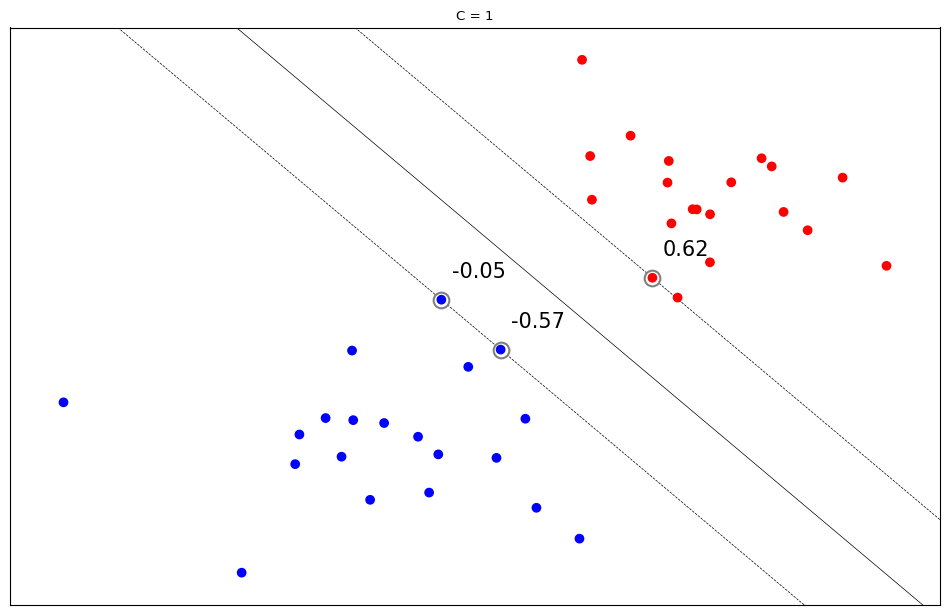

In [41]:
from sklearn.svm import SVC

# Plot SVM support vectors
def plot_linear_svm(X,y,C,ax):

    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane
    yy_down = (-1-w[0]*xx-clf.intercept_[0])/w[1]
    yy_up = (1-w[0]*xx-clf.intercept_[0])/w[1]

    # plot the line, the points, and the nearest vectors to the plane
    ax.set_title('C = %s' % C)
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=85*fig_scale, edgecolors='gray', c='w', zorder=10, lw=1*fig_scale)
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr)
    ax.axis('tight')

    # Add coefficients
    for i, coef in enumerate(clf.dual_coef_[0]):
        ax.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.1,clf.support_vectors_[i, 1]+0.35), fontsize=10*fig_scale, zorder=11)

    ax.set_xlim(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5)
    ax.set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    ax.set_xticks(())
    ax.set_yticks(())


# we create 40 separable points
np.random.seed(0)
svm_X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
svm_Y = [0] * 20 + [1] * 20
svm_fig, svm_ax = plt.subplots(figsize=(8*fig_scale,5*fig_scale))
plot_linear_svm(svm_X,svm_Y,1,svm_ax)

#### Faire des prédictions
- $a_i$ sera *0* si le point d'apprentissage se trouve à droite de la frontière de décision et en dehors de la marge. 
- Les échantillons d'apprentissage pour lesquels $a_i$ n'est pas 0 sont les _vecteurs de support_ 
- Le modèle SVM est donc entièrement défini par les vecteurs de support et leurs coefficients duaux (poids).

- Connaissant les coefficients duaux $a_i$, nous pouvons trouver les poids $w$ pour l'hyperplan de séparation à marge maximale :  

$$ \mathbf{w} = \sum_{i=1}^{l} a_i y_i \mathbf{x_i} $$

- Nous pouvons donc classer un nouvel échantillon $\mathbf{u}$ en examinant le signe de $\mathbf{w}\mathbf{u}+w_0$

##### SVM et kNN
* Rappelons que nous classons un nouveau point $\mathbf{u}$ en regardant le signe de :  

$$f(x) = \mathbf{w}\mathbf{u}+w_0 = \sum_{i=1}^{l} a_i y_i \mathbf{x_i}\mathbf{u}+w_0$$

* L'expression "k-nearest neighbor pondéré" est une généralisation du classificateur "k-nearest neighbor". Il classe les points en évaluant  

$$f(x) = \sum_{i=1}^{k} a_i y_i dist(x_i, u)^{-1}$$.

* D'où : Les SVM prédisent à peu près de la même manière que les k-NN, seulement :
    - Ils ne prennent en compte que les points réellement importants (les vecteurs de support) : Beaucoup plus rapide
        - Le nombre de voisins est le nombre de vecteurs de support.
    - La fonction de distance est un _produit intérieur des entrées_.

#### SVM régularisés (soft margin)

- Si les données ne sont pas linéairement séparables, la maximisation de la marge (dure) n'a plus de sens.
- Relâcher la contrainte en autorisant une erreur $\xi_{i}$ : $y_i (\mathbf{w}\mathbf{x_i} + w_0) \geq 1 - \xi_{i}$.
- Ou (puisque $\xi_{i} \geq 0$) :

$$\xi_{i} = max(0,1-y_i\cdot(\mathbf{w}\mathbf{x_i} + w_0))$$

- La somme sur tous les points est appelée _perte d'articulation_ : $\sum_i^n \xi_{i}$
- En atténuant la composante d'erreur avec un hyperparamètre $C$, nous obtenons l'objectif suivant

$$\mathcal{L}(\mathbf{w}) = ||\mathbf{w}||^2 + C \sum_i^n \xi_{i}$$

- Peut encore être résolu par la programmation quadratique

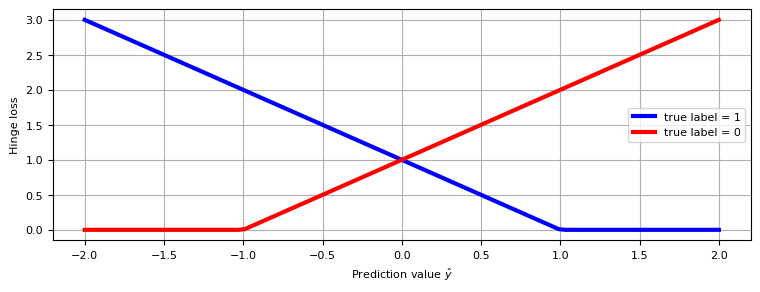

In [42]:
def hinge_loss(yHat, y):
    if y == 1:
        return np.maximum(0,1-yHat)
    else:
        return np.maximum(0,1+yHat)

fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(-2,2,100)

ax.plot(x,hinge_loss(x, 1),lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,hinge_loss(x, 0),lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Prediction value $\hat{y}$")
ax.set_ylabel("Hinge loss")
plt.grid()
plt.legend();

#### SVM des moindres carrés

- Nous pouvons également utiliser le _carré_ de toutes les erreurs, ou le carré de la perte de la charnière : $\sum_i^n \xi_{i}^2$
- On obtient ainsi l'objectif du SVM des moindres carrés

$$\mathcal{L}(\mathbf{w}) = ||\mathbf{w}||^2 + C \sum_i^n \xi_{i}^2$$

- Peut être résolu avec des multiplicateurs de Lagrange et un ensemble d'équations linéaires.
    - Permet toujours d'obtenir des vecteurs de support et de procéder à une kernelisation.
    - Les vecteurs de support ne sont pas rares, mais il existe des techniques d'élagage.

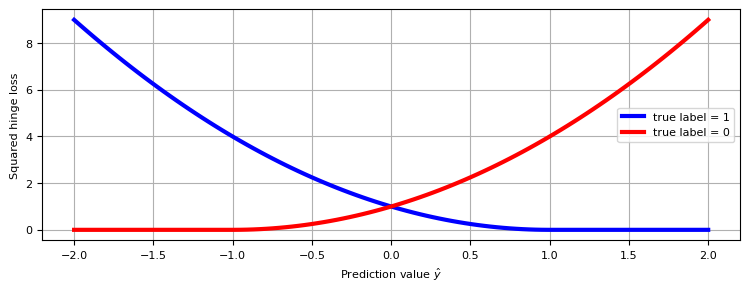

In [43]:
fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(-2,2,100)

ax.plot(x,hinge_loss(x, 1)** 2,lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,hinge_loss(x, 0)** 2,lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Prediction value $\hat{y}$")
ax.set_ylabel("Squared hinge loss")
plt.grid()
plt.legend();

#### Effet de la régularisation sur la marge et les vecteurs de support
- La loss Hinge du SVM agit comme une régularisation L1 et produit des modèles peu denses.
- C est la force de régularisation _inverse_ (inverse de $\alpha$ dans Lasso)
    - C plus grand : moins de vecteurs de support, marge plus petite, plus de surajustement
    - C plus petit : plus de vecteurs de support, marge plus large, moins de surajustement
- Doit être réglé avec soin en fonction des données.

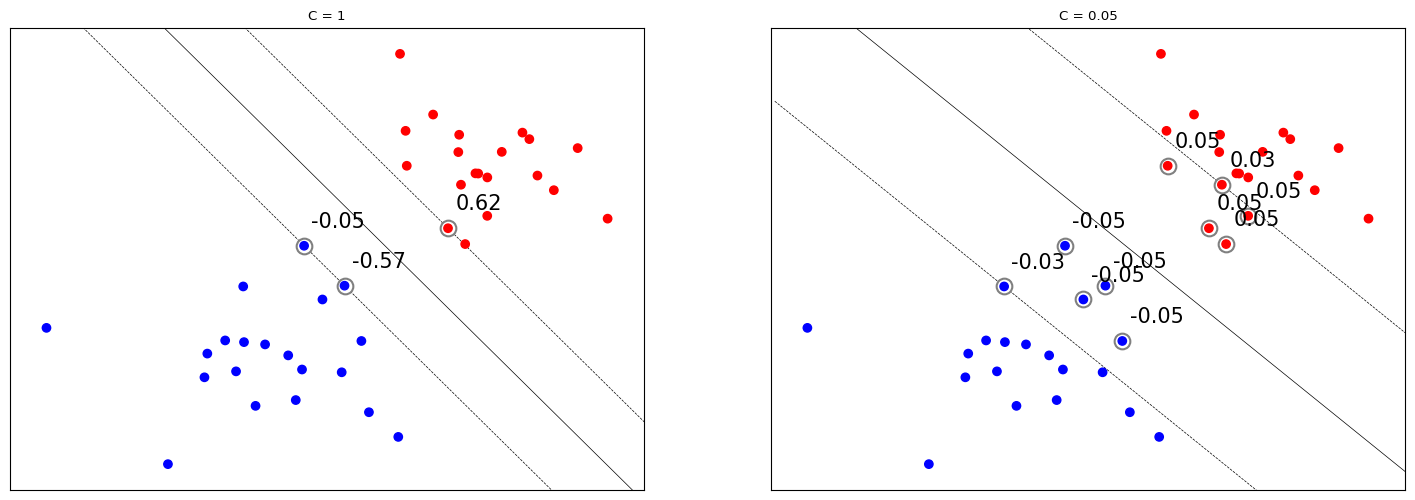

In [44]:
fig, svm_axes = plt.subplots(nrows=1, ncols=2, figsize=(12*fig_scale, 4*fig_scale))
plot_linear_svm(svm_X,svm_Y,1,svm_axes[0])
plot_linear_svm(svm_X,svm_Y,0.05,svm_axes[1])

Idem pour les données non linéairement séparables

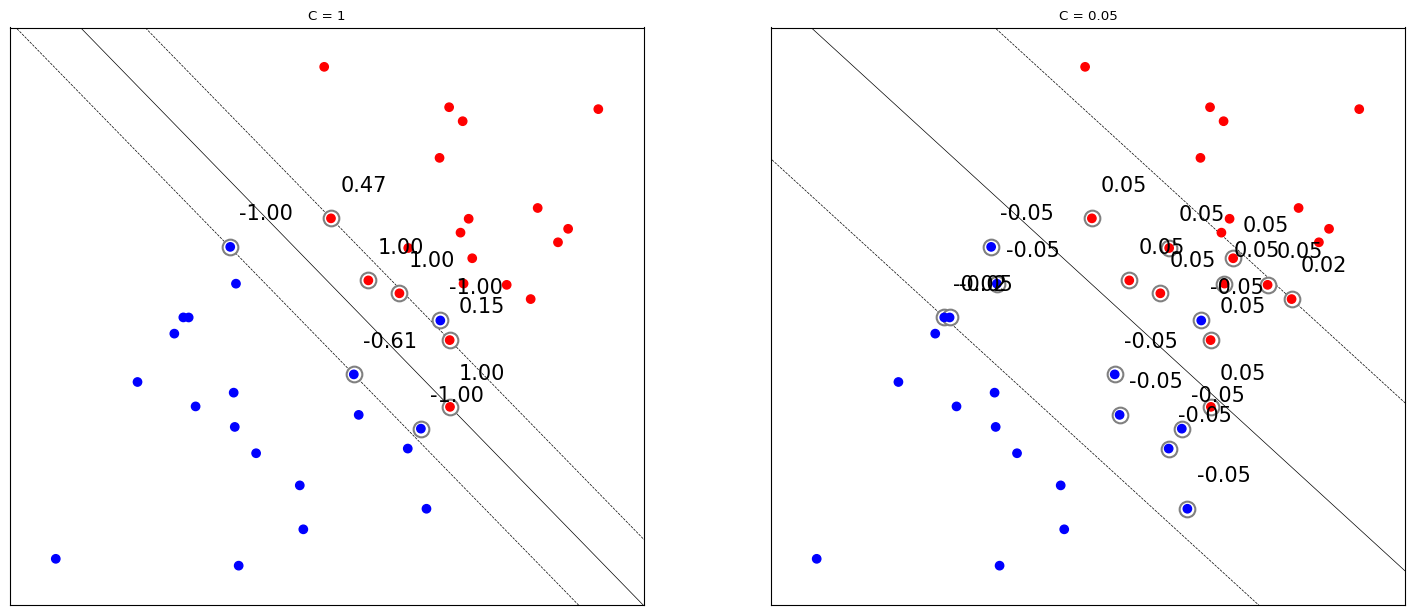

In [45]:
svm_X = np.r_[np.random.randn(20, 2) - [1, 1], np.random.randn(20, 2) + [1, 1]]
fig, svm_axes = plt.subplots(nrows=1, ncols=2, figsize=(12*fig_scale, 5*fig_scale))
plot_linear_svm(svm_X,svm_Y,1,svm_axes[0])
plot_linear_svm(svm_X,svm_Y,0.05,svm_axes[1])

De grandes valeurs de C peuvent conduire à un surajustement (par exemple, bruit d'ajustement), de petites valeurs peuvent conduire à un sous-ajustement.

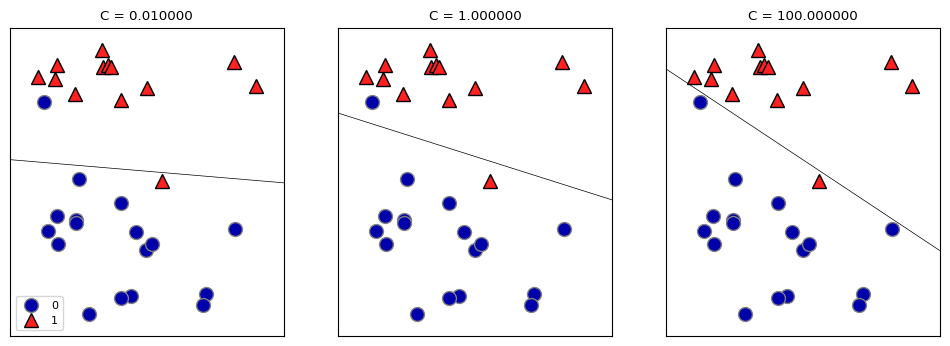

In [46]:
mglearn.plots.plot_linear_svc_regularization()

#### SVMs dans scikit-learn

- `svm.LinearSVC` : plus rapide pour les grands ensembles de données
    - Permet de choisir entre le primal et le dual. Le primal est recommandé quand $n$ >> $p$.
    - Retourne `coef_` ($\mathbf{w}$) et `intercept_` ($w_0$)
- `svm.SVC` avec `kernel=linear` : permet la _kernelisation_ (voir plus loin)
    - Renvoie également les `vecteurs de support_` (les vecteurs de support) et le `coef_duel_` $a_i$.
    - S'échelonne au moins quadratiquement avec le nombre d'échantillons $n$.
- `svm.LinearSVR` et `svm.SVR` sont des variantes pour la régression.

```python
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
print("Vecteurs de support :", clf.support_vectors_[ :])
print("Coefficients :", clf.dual_coef_[ :])
```

In [47]:
from sklearn import svm

# Linearly separable dat
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Get the support vectors and weights
print("Support vectors:")
print(clf.support_vectors_[:])
print("Coefficients:")
print(clf.dual_coef_[:])

Support vectors:
[[-1.021  0.241]
 [-0.467 -0.531]
 [ 0.951  0.58 ]]
Coefficients:
[[-0.048 -0.569  0.617]]


#### Résoudre les SVM avec la descente de gradient
* Les SVM à marge douce peuvent, alternativement, être résolus en utilisant la descente de gradient.
    * Bon pour les grands ensembles de données, mais ne produit pas de vecteurs de support ou de noyautage.
* Le carré de la charnière est différentiable
* La charnière n'est pas différentiable mais convexe et possède un sous-gradient :

$$mathcal{L_{Hinge}}(\mathbf{w}) = max(0,1-y_i (\mathbf{w}\mathbf{x_i} + w_0))$$.

$$\frac{\partial \mathcal{L_{Hinge}}}{\partial w_i} = \begin{cases}-y_i x_i & y_i (\mathbf{w}\mathbf{x_i} + w_0) < 1\\ 0 & \text{autre} \\ \end{cases}$$

* Peut être résolu avec la descente de gradient (stochastique)

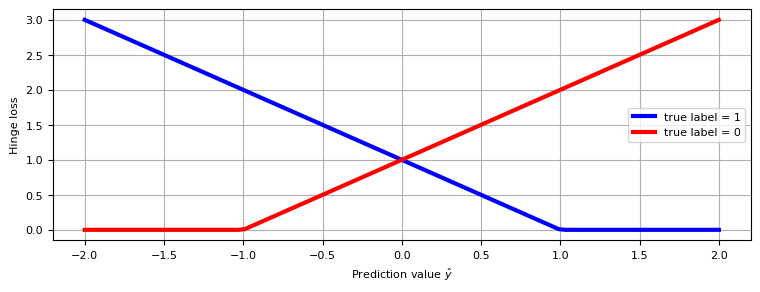

In [48]:
fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(-2,2,100)

ax.plot(x,hinge_loss(x, 1),lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,hinge_loss(x, 0),lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Prediction value $\hat{y}$")
ax.set_ylabel("Hinge loss")
plt.grid()
plt.legend();

#### SVM généralisés
* La dérivée de la perte de charnière n'étant pas définie à y=1, des versions lissées sont souvent utilisées :
    * Perte de charnière au carré : donne _least squares SVM_.
        - Équivalent à la classification Ridge (avec un solveur différent)
    * Perte de Huber modifiée : charnière quadratique, mais linéaire après -1. Robuste contre les valeurs aberrantes
* La perte logarithmique peut également être utilisée (équivalente à la régression logistique). 
* Dans sklearn, `SGDClassifier` peut être utilisé avec n'importe lequel d'entre eux. Bon pour les grands ensembles de données.

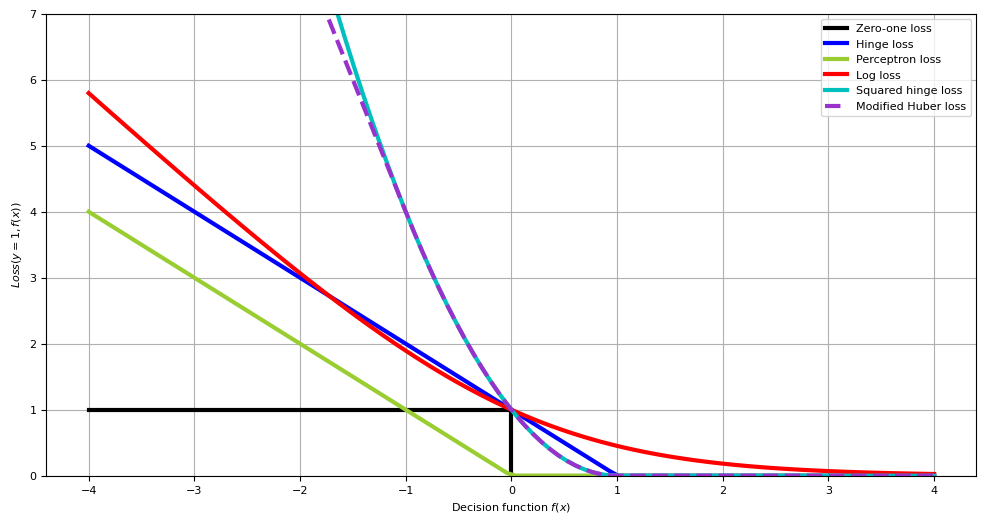

In [49]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2*fig_scale
fig, ax = plt.subplots(figsize=(8*fig_scale,4*fig_scale))
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'b-', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, 'c-', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 7))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$Loss(y=1, f(x))$")
plt.grid()
plt.legend();

### Perceptron
* Représente un seul neurone (nœud) avec des entrées $x_i$, un biais $w_0$, et une sortie $y$
* Chaque connexion a un poids (synaptique) $w_i$. Le nœud produit $\hat{y} = \sum_{i}^n x_{i}w_i + w_0$
* La _fonction d'activation_ prédit 1 si $\mathbf{xw} + w_0 > 0$, -1 sinon
* Les poids peuvent être appris avec la descente de gradient (stochastique) et la perte Hinge(0).
    * Mise à jour _uniquement_ en cas de mauvaise classification, corrige la sortie par $\pm1$.
    
    $$\mathcal{L}_{Perceptron} = max(0,-y_i (\mathbf{w}\mathbf{x_i} + w_0))$$
    
    $$\frac{\partial \mathcal{L_{Perceptron}}}{\partial w_i} =  \begin{cases}-y_i x_i & y_i (\mathbf{w}\mathbf{x_i} + w_0) < 0\\ 0 & \text{otherwise} \\ \end{cases}$$
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/perceptron.png" alt="ml" style="margin: 0 auto; width: 1500px;"/>

## Modèles linéaires pour la classification multiclasse
### one-vs-rest (aka one-vs-all)

* Apprendre un modèle binaire pour chaque classe par rapport à toutes les autres classes
* Créer autant de modèles binaires qu'il y a de classes

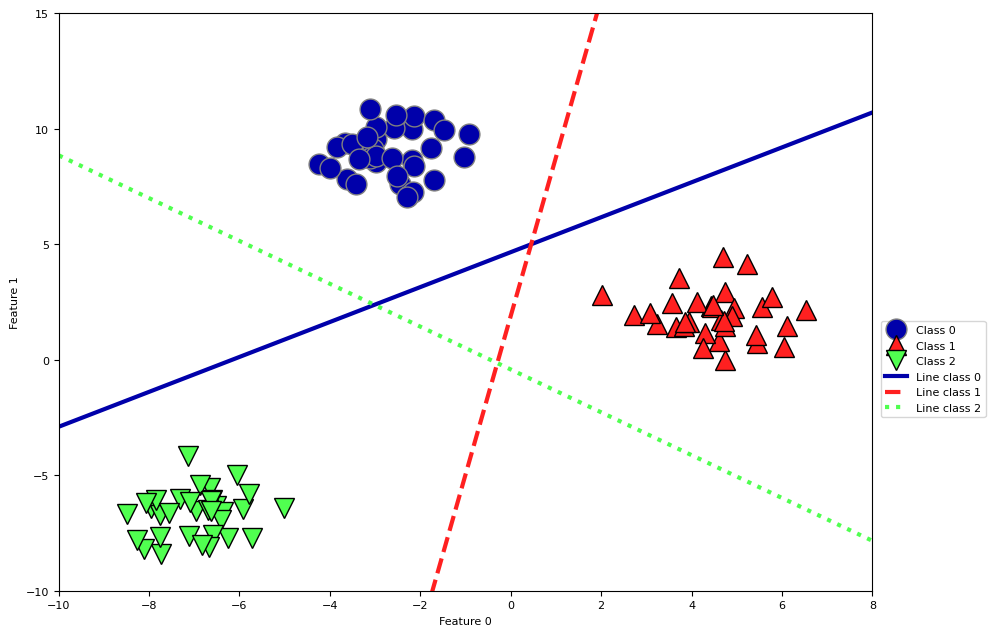

In [50]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)

plt.rcParams["figure.figsize"] = (7*fig_scale,5*fig_scale)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=10*fig_scale)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, lw=2*fig_scale)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3));

* Chaque classificateur binaire fait une prédiction, celle qui a le score le plus élevé (>0) l'emporte.

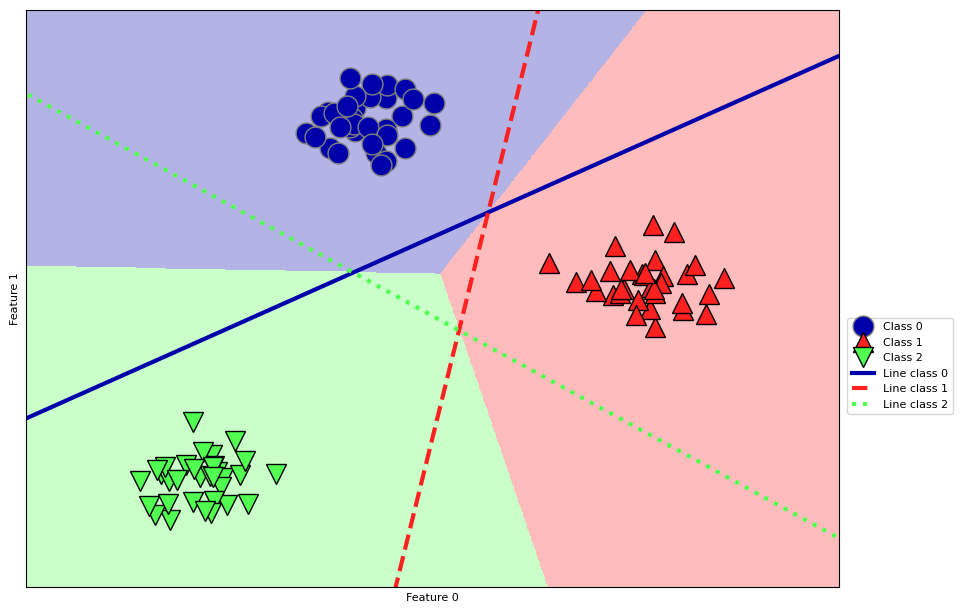

In [51]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=10*fig_scale)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, lw=2*fig_scale)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### un-vs-un
* Une alternative consiste à apprendre un modèle binaire pour chaque _combinaison_ de deux classes.
    * Pour $C$ classes, cela donne $\frac{C(C-1)}{2}$ modèles binaires.
    * Chaque point est classé en fonction d'un vote majoritaire parmi tous les modèles.
    * Il peut également s'agir d'un "vote doux" : additionner les probabilités (ou les valeurs de décision) pour tous les modèles. La classe dont la somme est la plus élevée l'emporte.
* Nécessite plus de modèles que la méthode "un contre un", mais l'apprentissage de chacun d'entre eux est plus rapide.
    * Seuls les exemples de deux classes sont inclus dans les données d'apprentissage.
* Recommandé pour les algorithmes qui apprennent bien sur de petits ensembles de données 
    Recommandé pour les algorithmes qui apprennent bien sur de petits ensembles de données * Particulièrement les SVM et les processus gaussiens

In [52]:
%%HTML
<style>
td {font-size: 16px}
th {font-size: 16px}
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 16px;
}
</style>

## Aperçu des modèles linéaires

| Name | Representation | Loss function | Optimization | Regularization |
|---|---|---|---|---|
| Least squares    | Linear function (R) | SSE | CFS or SGD | None |
| Ridge | Linear function (R) | SSE + L2 | CFS or SGD | L2 strength ($\alpha$)  |
| Lasso | Linear function (R) | SSE + L1 | Coordinate descent   | L1 strength ($\alpha$)  |
| Elastic-Net | Linear function (R) | SSE + L1 + L2 | Coordinate descent   | $\alpha$, L1 ratio ($\rho$)  |
| SGDRegressor | Linear function (R) | SSE, Huber, $\epsilon$-ins,... + L1/L2 | SGD   | L1/L2, $\alpha$  |
| Logistic regression | Linear function (C) | Log + L1/L2 | SGD, coordinate descent,...   | L1/L2, $\alpha$ |
| Ridge classification | Linear function (C) | SSE + L2 | CFS or SGD   | L2 strength ($\alpha$) |
| Linear SVM | Support Vectors | Hinge(1) | Quadratic programming or SGD | Cost (C) |
| Least Squares SVM | Support Vectors | Squared Hinge | Linear equations or SGD | Cost (C) |
| Perceptron | Linear function (C) | Hinge(0) | SGD | None |
| SGDClassifier | Linear function (C) | Log, (Sq.) Hinge, Mod. Huber,... | SGD | L1/L2, $\alpha$ |

* SSE : Somme des erreurs quadratiques
* CFS : Closed-form solution (solution de forme fermée)
* SGD : descente de gradient (stochastique) et variantes
* (R)égression, (C)lassification

## Résumé

- Modèles linéaires
    - Bons pour les très grands ensembles de données (évolutifs)
    - Conviennent pour les données à très haute dimension (pas pour les données à faible dimension)
- Peuvent également être utilisés pour ajuster des modèles non linéaires ou à faible dimension (voir plus loin).
    - Prétraitement : par exemple, transformations polynomiales ou de Poisson
    - Modèles linéaires généralisés (noyautage)
- La régularisation est importante. Ajuster la force de régularisation ($\alpha$)
    - Crête (L2) : Bonne adaptation, parfois sensible aux valeurs aberrantes
    - Lasso (L1) : Modèles épars : moins de caractéristiques, plus facile à interpréter, plus rapide
    - Elastic-Net : Compromis entre les deux, par exemple pour les caractéristiques corrélées 
- La plupart peuvent être résolus par différents optimiseurs (solveurs)
    - Solutions de forme fermée ou solveurs quadratiques/linéaires pour les petits ensembles de données
    - Variantes de descente de gradient (SGD, CD, SAG, CG,...) pour les ensembles de données plus importants.
- La classification multi-classe peut être réalisée en utilisant une approche "un contre tous".

### Distributions and Probabilities
* The normal (Gaussian) distribution with mean $\mu$ and standard deviation $\sigma$ is noted as $N(\mu,\sigma)$
* A random variable $X$ can be continuous or discrete
* A probability distribution $f_X$ of a continuous variable $X$: _probability density function_ (pdf)
    * The _expectation_ is given by $\mathbb{E}[X] = \int x f_{X}(x) dx$
* A probability distribution of a discrete variable: _probability mass function_ (pmf)
    * The _expectation_ (or mean) $\mu_X = \mathbb{E}[X] = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_pdf.png" alt="ml" style="width: 70%;"/>

### Distributions and Probabilities
*The normal (Gaussian) distribution with mean $\mu$ and standard deviation $\sigma$ is noted as $N(\mu,\sigma)$* A random variable $X$ can be continuous or discrete
*A probability distribution $f_X$ of a continuous variable $X$: _probability density function_ (pdf)* The _expectation_ is given by $\mathbb{E}[X] = \int x f_{X}(x) dx$
*A probability distribution of a discrete variable: _probability mass function_ (pmf)* The _expectation_ (or mean) $\mu_X = \mathbb{E}[X] = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_pdf.png" alt="ml" style="width: 70%;"/>